# Descrição do problema - Dataset Albalone

O problema busca prever a idade de um albalone (que é uma espécie de molusco marinho) através de características físicas disponibilizadas em um conjunto de dados. A idade de um albalone é determinada cortando a concha deste molusco, mancando-a e contando o número de anéis através de um microscópio, tarefa que não é fácil nem simples. Para resolver este problema de determinação da idade também são utilizadas outras formas que usam informações climáticas e de localização. 


Foi resolvido através de ferramentas de machine learning é de classificação  e a **classe a ser prevista é o número de anéis da concha do albalone** . A classe número de anéis é uma variável numérica inteira.

O conjunto de dados possui 8 atributos (nominais e numéricos) e 4177 instâncias. Não há missing values.



Os atributos utilizados para o problema de classificação estão descritos abaixo:

**SEXO** – variável nominal. Pode ser M (macho), F (fêmea) ou I (bebê).

**COMPRIMENTO** – variável numérica contínua. Medida em milímetros, correspondente a maior medição da carcaça.

**DIÂMETRO** – variável numérica contínua. Medida em milímetros, sendo perpendicular ao comprimento. 

**ALTURA** - variável numérica contínua. Medida em milímetros, correspondente a medida da altura da carne com a casca. 

**PESO TOTAL** – variável numérica contínua. Medida em gramas, correspondente ao peso do albalone inteiro.

**PESO SEM CASCA** - variável numérica contínua. Medida em gramas, correspondente ao peso somente da carne do albalone.

**PESO DAS VÍSCERAS**- variável numérica contínua. Medida em gramas, correspondente ao peso do intestino após o sangramento.

**PESO DA CASCA** - variável numérica contínua. Medida em gramas, correspondente ao peso somente da carne do albalone depois de seca.


In [1]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")
from pprint import pprint

# Importação de pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import set_printoptions

from sklearn.preprocessing import MinMaxScaler # para normalização
from sklearn.preprocessing import StandardScaler # para padronização
from sklearn.preprocessing import OrdinalEncoder # para ordinal encoding
from sklearn.preprocessing import OneHotEncoder # para one-hot encoding e dummies

from sklearn.model_selection import train_test_split

from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.pipeline import Pipeline

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score , confusion_matrix , classification_report

In [2]:
# importando dados uma url para um dataframe

# url a importar
url_dados = 'http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data'
# labels dos atributos do dataset
atributos = ['sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
df = pd.read_csv(url_dados, names=atributos)

# 2. Análise exploratória de dados

In [3]:
# dimensão do dataset
print(df.shape)

(4177, 9)


In [4]:
df.head()

,sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [6]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [7]:
df.isnull().sum()    #Dataset sem vazios!

sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [8]:
# verificar qtd de linhas duplicadas
df.duplicated(keep=False).sum()

0

In [9]:
df.columns    #colunas do dataset

Index(['sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

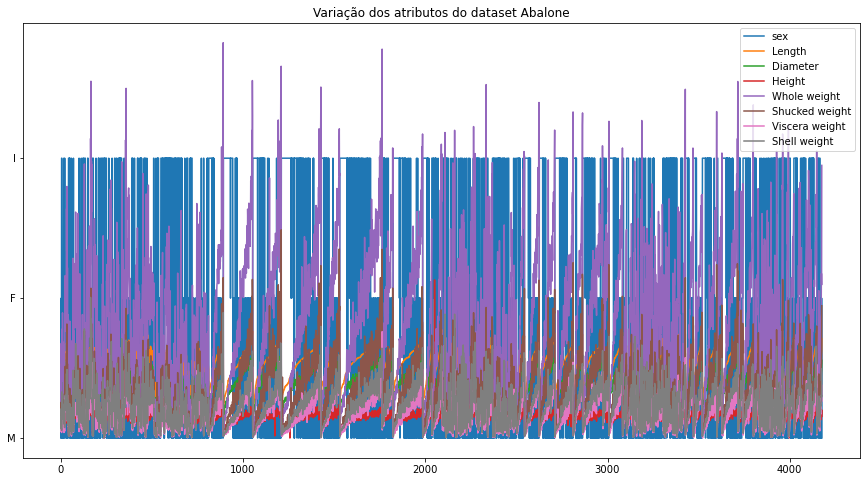

In [10]:
# Gráfico de Linhas

# selecionando apenas os atributos para serem plotados
atributos2 = df.columns.drop(['Rings'])

fig, ax = plt.subplots(1, figsize= (15,8))
# criando o eixo x
x_data = range(0, df.shape[0])

# plotando cada atributo
for atributo in atributos2:
    plt.plot(x_data, df[atributo], label=atributo)
    
# incluindo título do gráfico e legenda
plt.title('Variação dos atributos do dataset Abalone')
plt.legend();

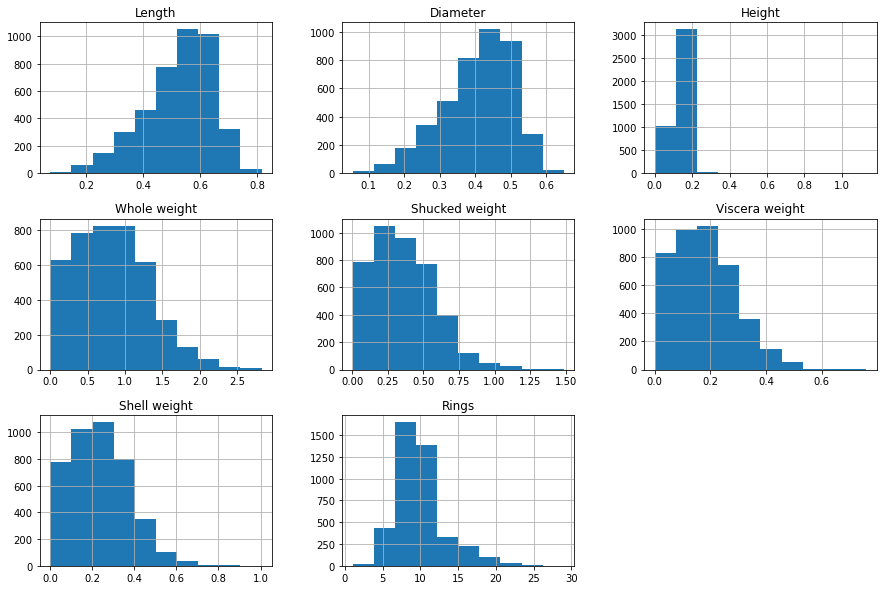

In [11]:
df.hist(figsize = (15,10))
plt.show()

##2.11. O density plot apresenta uma visualização parecida com o histograma, onde é possível visualizar as distribuições em cada atributo.


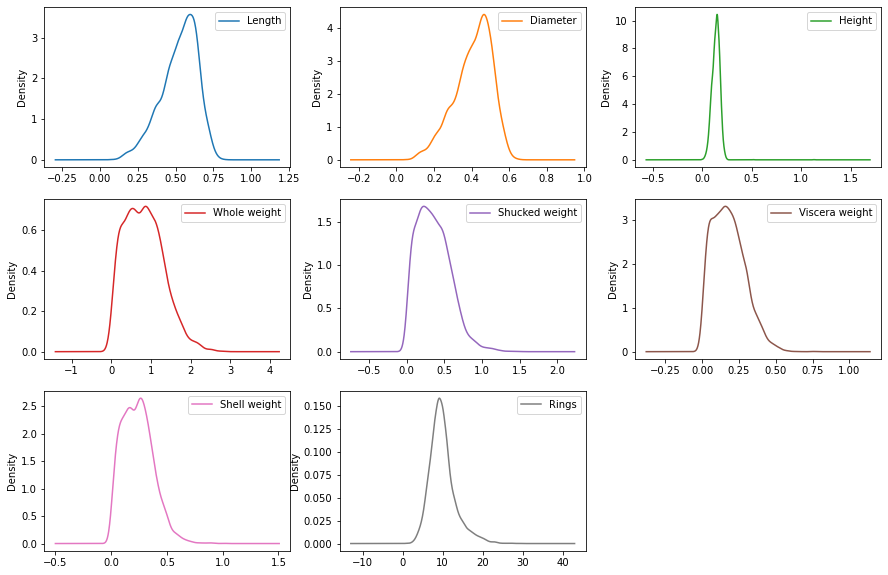

In [12]:
# Density Plot
df.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False, figsize = (15,10))
plt.show()

In [13]:
# distribuição das classes
print(df.groupby('Rings').size())

Rings
1       1
2       1
3      15
4      57
5     115
6     259
7     391
8     568
9     689
10    634
11    487
12    267
13    203
14    126
15    103
16     67
17     58
18     42
19     32
20     26
21     14
22      6
23      9
24      2
25      1
26      1
27      2
29      1
dtype: int64


<AxesSubplot:>

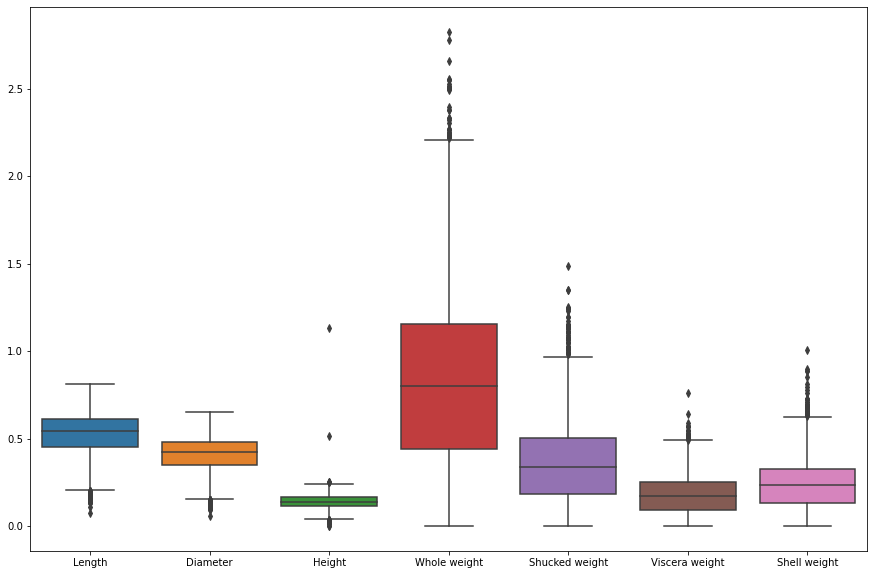

In [14]:
# boxplot com seaborn

fig, ax = plt.subplots(1, figsize= (15,10))
sns.boxplot(ax = ax, data = df.drop(['Rings'], axis=1),)

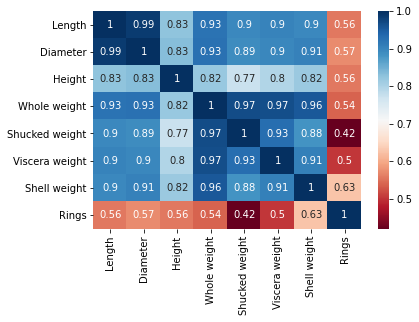

In [15]:
# matriz de correlação com seaborn
sns.heatmap(df.corr(), annot=True, cmap='RdBu');

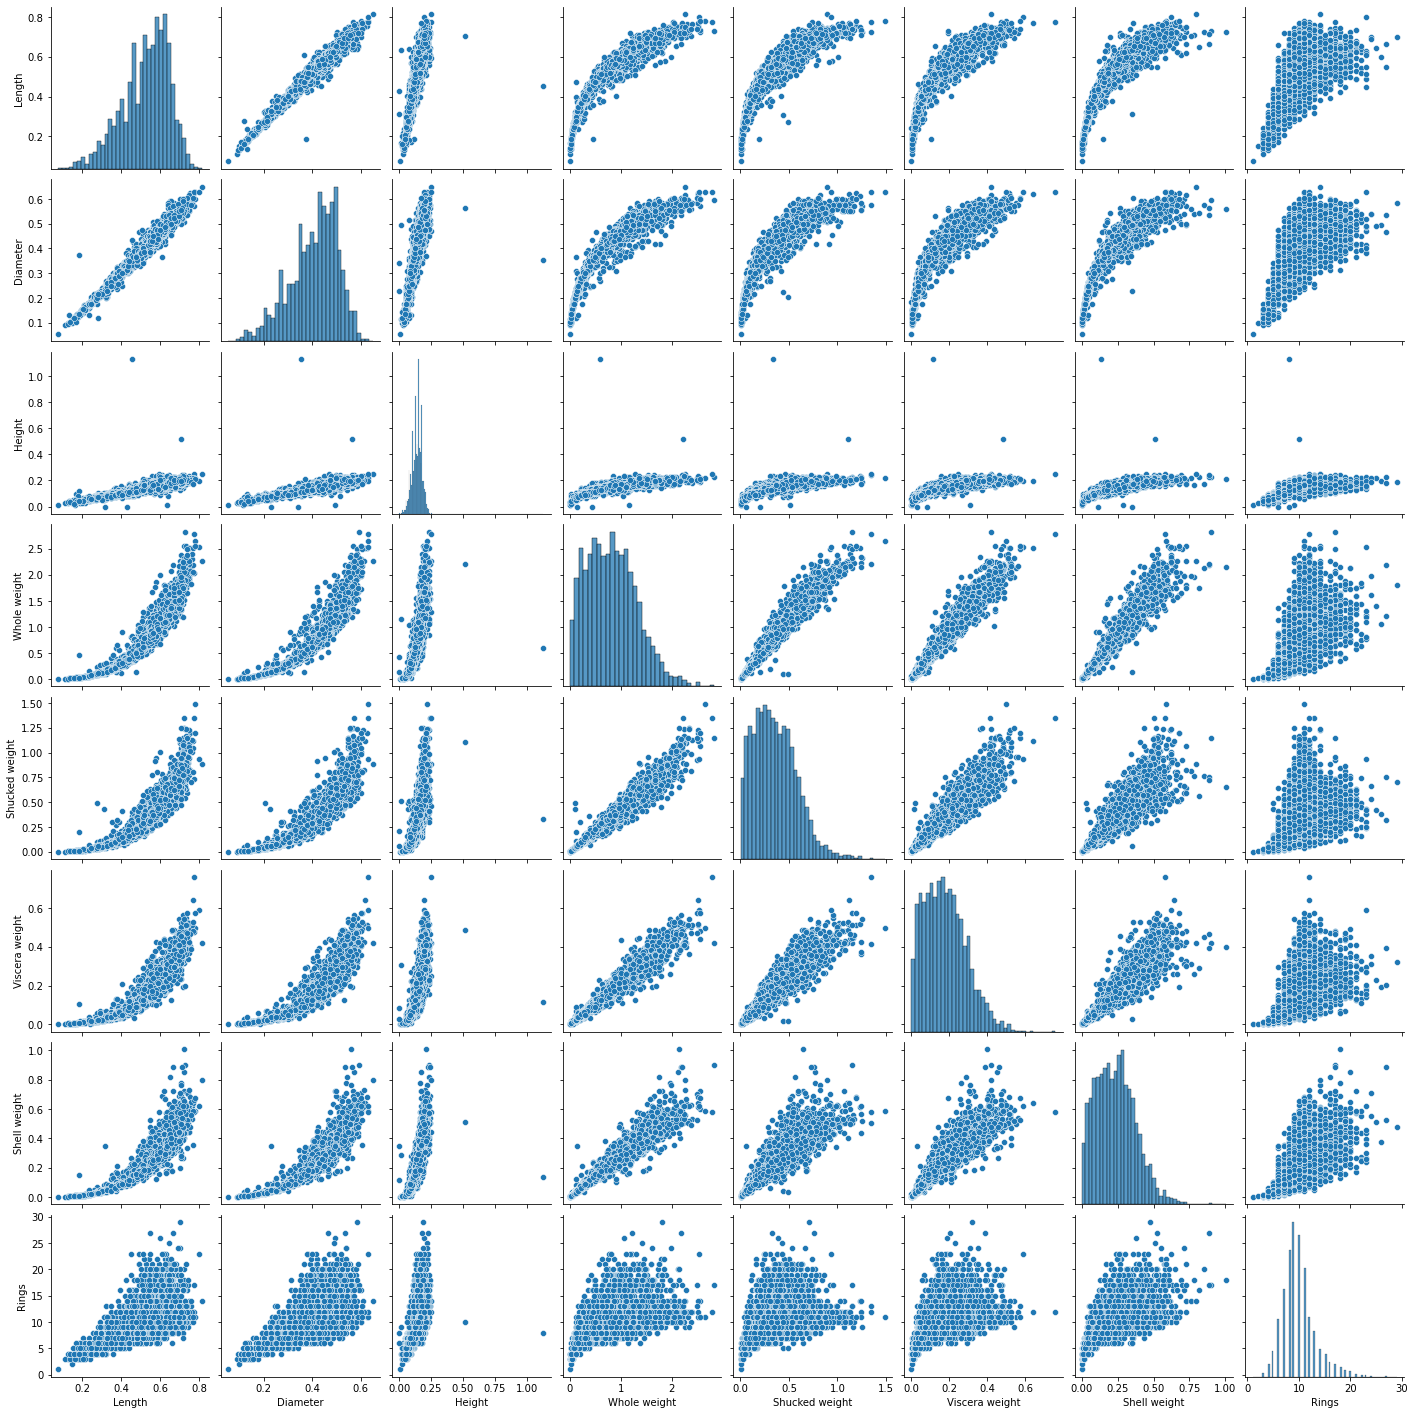

In [16]:
sns.pairplot(df)

# 3. Pré-processamento

In [17]:
# criação de um novo dataset (df2) com a transformação do atributo SEX em três atributos numéricos (F,M,I)
df2 = df.copy()

In [18]:
df2['sex'].unique()

array(['M', 'F', 'I'], dtype=object)

In [19]:
#aplicando a transformação para os dados categóricos (no nosso caso a variável sex)

dummy = pd.get_dummies(df['sex'],drop_first =False)
df2 = pd.concat([df2, dummy], axis=1) 
df2.drop(['sex'], inplace=True, axis=1)

Mudando a ordem das colunas

In [20]:
df2 = df2[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'F' ,'I', 'M','Rings']]

In [21]:
df2.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,F,I,M,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,0,0,1,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0,0,1,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1,0,0,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0,0,1,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0,1,0,7


## Remoção de outliers - conforme verificado no boxplot na etapa de pré-processamento, todos os atributos do dataset possuem outliers. O dataset original possui 4177 instâncias, e após a retirada de outliers com o procedimento abaixo restaram 3781 instâncias.


### A variação interquartil (IQR) pode ser usada para identificar matematicamente os outliers de um conjunto de dados.

In [22]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Length            0.1650
Diameter          0.1300
Height            0.0500
Whole weight      0.7115
Shucked weight    0.3160
Viscera weight    0.1595
Shell weight      0.1990
Rings             3.0000
dtype: float64


In [23]:
df3 = df.copy()

In [24]:
df3= df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [25]:
dummy = pd.get_dummies(df3['sex'],drop_first =False)
df3 = pd.concat([df3, dummy], axis=1) 
df3.drop(['sex'], inplace=True, axis=1)

In [26]:
df3 = df3[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'F' ,'I', 'M','Rings']]

In [27]:
df3.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,F,I,M,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,0,0,1,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0,0,1,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1,0,0,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0,0,1,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0,1,0,7


In [28]:
df3.shape  #dataset sem os outliers

(3781, 11)

In [29]:
df2.shape #dataset com possíveis outliers

(4177, 11)

In [30]:
# Criando nova variável target - dataset com outlier
df2['Rings'] = np.where(df2['Rings'] <= 9,1,0)

In [31]:
# Criando nova variável target - dataset sem outlier
df3['Rings'] = np.where(df3['Rings'] <= 9,1,0)

In [32]:
#dataset sem outlier
df3.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,F,I,M,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,0,0,1,0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0,0,1,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1,0,0,1
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0,0,1,0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0,1,0,1


In [33]:
#dataset com outlier
df2.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,F,I,M,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,0,0,1,0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0,0,1,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1,0,0,1
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0,0,1,0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0,1,0,1


In [34]:
#dataset original
df.head()

,sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## Separação do dataset com os outliers em conjuntos de treino e teste df2

Os dados de treino são formados por geralmente 70-80% dos dados e são utilizados na construção do modelo. Os dados de teste são formados geralmente por 20-30% dos dados e são utilizados para a avaliação do modelo.

In [35]:
# separando os atributos e a classe do dataset
array = df2.values
x = array[:,0:10]
y = array[:,10]

# definindo o tamanho do conjunto de teste
test_size = 0.30 

# A semente (seed) pode ser qualquer número, e garante que os resultados possam ser reproduzidos de forma idêntica toda vez que o script for rodado. 
# Isto é muito importante quando trabalhamos com modelos ou métodos que utilizam de algum tipo de aleatoriedade.
seed = 7

# particionando em conjuntos de treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)

### Separação do dataset sem os outliers em conjuntos de treino e teste df3

In [36]:
# separando os atributos e a classe do dataset
array = df3.values
x1 = array[:,0:10]
y1 = array[:,10]

# definindo o tamanho do conjunto de teste
test_size = 0.30 

# A semente (seed) pode ser qualquer número, e garante que os resultados possam ser reproduzidos de forma idêntica toda vez que o script for rodado. 
# Isto é muito importante quando trabalhamos com modelos ou métodos que utilizam de algum tipo de aleatoriedade.
seed = 7

# particionando em conjuntos de treino e teste
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=test_size, random_state=seed)

#### Novo dataset com menos atributos df4


In [37]:
df4 = df.copy()
df4.head()

,sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [38]:
dummy = pd.get_dummies(df4['sex'],drop_first =False)
df4 = pd.concat([df4, dummy], axis=1) 
df4.drop(['sex'], inplace=True, axis=1)

In [39]:
 df4.drop(['Height', 'M','F'], axis=1)
 

,Length,Diameter,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,I
0,0.455,0.365,0.5140,0.2245,0.1010,0.1500,15,0
1,0.350,0.265,0.2255,0.0995,0.0485,0.0700,7,0
2,0.530,0.420,0.6770,0.2565,0.1415,0.2100,9,0
3,0.440,0.365,0.5160,0.2155,0.1140,0.1550,10,0
4,0.330,0.255,0.2050,0.0895,0.0395,0.0550,7,1
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.8870,0.3700,0.2390,0.2490,11,0
4173,0.590,0.440,0.9660,0.4390,0.2145,0.2605,10,0
4174,0.600,0.475,1.1760,0.5255,0.2875,0.3080,9,0
4175,0.625,0.485,1.0945,0.5310,0.2610,0.2960,10,0


In [40]:
df4 = df4[['Length', 'Diameter',  'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight','I', 'Rings']]

In [41]:
df4['Rings'] = np.where(df4['Rings'] <= 9,1,0)

In [42]:
df4.head()

,Length,Diameter,Whole weight,Shucked weight,Viscera weight,Shell weight,I,Rings
0,0.455,0.365,0.5140,0.2245,0.1010,0.150,0,0
1,0.350,0.265,0.2255,0.0995,0.0485,0.070,0,1
2,0.530,0.420,0.6770,0.2565,0.1415,0.210,0,1
3,0.440,0.365,0.5160,0.2155,0.1140,0.155,0,0
4,0.330,0.255,0.2050,0.0895,0.0395,0.055,1,1


In [43]:
# separando os atributos e a classe do dataset
array = df4.values
x2 = array[:,0:7]
y2 = array[:,7]

# definindo o tamanho do conjunto de teste
test_size = 0.30 

# A semente (seed) pode ser qualquer número, e garante que os resultados possam ser reproduzidos de forma idêntica toda vez que o script for rodado. 
# Isto é muito importante quando trabalhamos com modelos ou métodos que utilizam de algum tipo de aleatoriedade.
seed = 7

# particionando em conjuntos de treino e teste
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=test_size, random_state=seed)

## Seleção de atributos 
Caso existam muitos atributos no conjunto de dados, nesta etapa podem ser selecionados alguns atributos para a criação dos modelos, com base na importância de cada atributo para a classe a ser predita. Para fazer esta seleção foram utilizadas as técnicas Extra Tree, Teste do Qui Quadrado e Eliminação recursiva de atributos. Os sete melhores atributos em ordem utilizando a técnica do qui quadrado são: I, peso total, F, peso da concha, peso sem casca, peso das vísceras, M. Os sete melhores atributos em ordem utilizando a técnica extra tree são: peso da concha, peso sem casca, peso total, peso das vísceras, altura, diâmetro e comprimento. Os sete melhores atributos utilizando a técnica da eliminação recursiva de atributos são: diâmetro, altura, peso total, peso sem casca, peso da víscera, peso da concha e I.

### Usando extra tree


In [44]:
# Criação do modelo para seleção de atributos
modelo = ExtraTreesClassifier(n_estimators=100)
modelo.fit(x_train, y_train)

# Exibe os atributos orginais
print("\nAtributos Originais:", df2.columns[0:10])

# Exibe a pontuação de importância para cada atributo (quanto maior a pontuação, mais importante é o atributo). 
# 
print(modelo.feature_importances_)


Atributos Originais: Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'F', 'I', 'M'],
      dtype='object')
[0.11899981 0.12176899 0.09946505 0.13914655 0.1265412  0.1135221
 0.18059207 0.01685207 0.07090773 0.01220442]


Melhores: Shell weight, Whole weight e Length

### Usando o teste qui-quadrado

In [45]:
# Função para seleção de atributos
best_var = SelectKBest(score_func=chi2, k=7)

# Executa a função de pontuação em (X_train, Y_train) e obtém os atributos selecionados
fit = best_var.fit(x_train, y_train)

# Reduz X para os atributos selecionados
features = fit.transform(x_train)

# Resultados
print('\nNúmero original de atributos:', x.shape[1])
print('\nNúmero reduzido de atributos:', features.shape[1])

# Exibe os atributos orginais
print("\nAtributos Originais:", df2.columns[0:10])

# Exibe as pontuações de cada atributos e os 4 escolhidas (com as pontuações mais altas):
# (Basta mapear manualmente o índice dos nomes dos respectivos atributos)
set_printoptions(precision=3) # 3 casas decimais
print(fit.scores_)


Número original de atributos: 10

Número reduzido de atributos: 7

Atributos Originais: Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'F', 'I', 'M'],
      dtype='object')
[ 21.962  20.375   9.559 243.504  82.181  52.245  80.525 117.1   359.074
  61.644]


3 Piores: height,diameter e length

### Usando eliminacao recursiva de atributos

In [46]:
# Criação do modelo
modelo = LogisticRegression(max_iter=200)

# Eliminação Recursiva de Variáveis
rfe = RFE(modelo, 7)
fit = rfe.fit(x_train, y_train)

# Print dos resultados
print("\nAtributos Originais:", df2.columns[0:10])
print("\nAtributos selecionados: %s" % fit.support_)
print("\nRanking de atributos: %s" % fit.ranking_)
print("\nQtd de melhores Atributos: %d" % fit.n_features_)


Atributos Originais: Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'F', 'I', 'M'],
      dtype='object')

Atributos selecionados: [ True  True  True  True  True False  True False  True False]

Ranking de atributos: [1 1 1 1 1 4 1 2 1 3]

Qtd de melhores Atributos: 7


# 4. Modelagem e inferência

In [47]:
# Parâmetros Escolha de procedimentos e métricas de avaliação
num_folds = 10
acuracia = 'accuracy'
recall = 'recall'
precisao = 'precision'

## Tunning prévio KNN, SVM, CART e Random Forest

### Tunning KNN - dataset df2

In [48]:
#Gridsearch para Tunning de KNN para dataframe completo com outliers (df2) e não modificado (sem padronização ou normalização)

#hiperparâmetros que serão avaliados:
k = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31]
distancias = ["euclidean", "manhattan", "minkowski"]
param_grid = dict(n_neighbors=k, metric = distancias)

#modelo
model = KNeighborsClassifier()
kfold = KFold(n_splits=10)

# busca exaustiva de hiperparâmetros com GridSearchCV
grid = GridSearchCV(estimator=model,param_grid=param_grid, scoring = acuracia, cv=kfold)
grid_result= grid.fit(x,y)

# imprime o melhor resultado
print("Melhor %f usando %s" % (grid_result.best_score_, grid_result.best_params_))

# imprime todos os resultados
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f): %r" % (mean, stdev, param))

Melhor 0.783576 usando {'metric': 'euclidean', 'n_neighbors': 21}
0.722527 (0.019991): {'metric': 'euclidean', 'n_neighbors': 1}
0.749349 (0.017774): {'metric': 'euclidean', 'n_neighbors': 3}
0.766588 (0.014381): {'metric': 'euclidean', 'n_neighbors': 5}
0.774007 (0.012463): {'metric': 'euclidean', 'n_neighbors': 7}
0.776638 (0.015077): {'metric': 'euclidean', 'n_neighbors': 9}
0.779512 (0.013842): {'metric': 'euclidean', 'n_neighbors': 11}
0.780470 (0.012198): {'metric': 'euclidean', 'n_neighbors': 13}
0.778314 (0.011848): {'metric': 'euclidean', 'n_neighbors': 15}
0.777358 (0.014825): {'metric': 'euclidean', 'n_neighbors': 17}
0.782384 (0.018031): {'metric': 'euclidean', 'n_neighbors': 19}
0.783576 (0.019547): {'metric': 'euclidean', 'n_neighbors': 21}
0.780707 (0.019940): {'metric': 'euclidean', 'n_neighbors': 23}
0.780705 (0.018624): {'metric': 'euclidean', 'n_neighbors': 25}
0.781663 (0.016909): {'metric': 'euclidean', 'n_neighbors': 27}
0.778071 (0.018362): {'metric': 'euclidean'

In [49]:
#Gridsearch para Tunning de KNN para dataframe completo com outliers (df2) e padronizado

#padronização dos dados:
scaler = StandardScaler().fit(x)
rescaledx = scaler.transform(x)

#hiperparâmetros que serão avaliados:
k = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31]
distancias = ["euclidean", "manhattan", "minkowski"]
param_grid = dict(n_neighbors=k, metric = distancias)

#modelo
model = KNeighborsClassifier()
kfold = KFold(n_splits=10)

# busca exaustiva de hiperparâmetros com GridSearchCV
grid = GridSearchCV(estimator=model,param_grid=param_grid, scoring = acuracia, cv=kfold)
grid_result= grid.fit(rescaledx,y)

# imprime o melhor resultado
print("Melhor %f usando %s" % (grid_result.best_score_, grid_result.best_params_))

# imprime todos os resultados
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f): %r" % (mean, stdev, param))

Melhor 0.779507 usando {'metric': 'euclidean', 'n_neighbors': 21}
0.710078 (0.022000): {'metric': 'euclidean', 'n_neighbors': 1}
0.754368 (0.012692): {'metric': 'euclidean', 'n_neighbors': 3}
0.767538 (0.013797): {'metric': 'euclidean', 'n_neighbors': 5}
0.768738 (0.019345): {'metric': 'euclidean', 'n_neighbors': 7}
0.767538 (0.009853): {'metric': 'euclidean', 'n_neighbors': 9}
0.774960 (0.014960): {'metric': 'euclidean', 'n_neighbors': 11}
0.773763 (0.019191): {'metric': 'euclidean', 'n_neighbors': 13}
0.773763 (0.017886): {'metric': 'euclidean', 'n_neighbors': 15}
0.775436 (0.015507): {'metric': 'euclidean', 'n_neighbors': 17}
0.778548 (0.015647): {'metric': 'euclidean', 'n_neighbors': 19}
0.779507 (0.015920): {'metric': 'euclidean', 'n_neighbors': 21}
0.779270 (0.016880): {'metric': 'euclidean', 'n_neighbors': 23}
0.777114 (0.016681): {'metric': 'euclidean', 'n_neighbors': 25}
0.776156 (0.017555): {'metric': 'euclidean', 'n_neighbors': 27}
0.778314 (0.020043): {'metric': 'euclidean'

In [50]:

#Gridsearch para Tunning de KNN para dataframe completo com outliers (df2) e normalizado

#padronização dos dados:
scaler = MinMaxScaler().fit(x)
rescaledx = scaler.transform(x)

#hiperparâmetros que serão avaliados:
k = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31]
distancias = ["euclidean", "manhattan", "minkowski"]
param_grid = dict(n_neighbors=k, metric = distancias)

#modelo
model = KNeighborsClassifier()
kfold = KFold(n_splits=10)

# busca exaustiva de hiperparâmetros com GridSearchCV
grid = GridSearchCV(estimator=model,param_grid=param_grid, scoring = acuracia, cv=kfold)
grid_result= grid.fit(rescaledx,y)

# imprime o melhor resultado
print("Melhor %f usando %s" % (grid_result.best_score_, grid_result.best_params_))

# imprime todos os resultados
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f): %r" % (mean, stdev, param))

Melhor 0.782621 usando {'metric': 'manhattan', 'n_neighbors': 27}
0.713195 (0.019789): {'metric': 'euclidean', 'n_neighbors': 1}
0.743355 (0.018178): {'metric': 'euclidean', 'n_neighbors': 3}
0.759163 (0.017615): {'metric': 'euclidean', 'n_neighbors': 5}
0.768975 (0.015147): {'metric': 'euclidean', 'n_neighbors': 7}
0.771847 (0.016033): {'metric': 'euclidean', 'n_neighbors': 9}
0.769693 (0.016924): {'metric': 'euclidean', 'n_neighbors': 11}
0.773765 (0.016817): {'metric': 'euclidean', 'n_neighbors': 13}
0.776160 (0.018116): {'metric': 'euclidean', 'n_neighbors': 15}
0.776397 (0.017305): {'metric': 'euclidean', 'n_neighbors': 17}
0.781188 (0.024211): {'metric': 'euclidean', 'n_neighbors': 19}
0.782383 (0.021938): {'metric': 'euclidean', 'n_neighbors': 21}
0.781907 (0.019603): {'metric': 'euclidean', 'n_neighbors': 23}
0.779508 (0.018634): {'metric': 'euclidean', 'n_neighbors': 25}
0.779032 (0.019790): {'metric': 'euclidean', 'n_neighbors': 27}
0.779748 (0.019744): {'metric': 'euclidean'

Melhor modelo com dataset df2 (com outliers) para KNN foi considerado o seguinte:

df2 sem transformação:

Melhor 0.783576 usando {'metric': 'euclidean', 'n_neighbors': 21} 


### Tunning KNN - dataset df3 sem outliers:

In [51]:
#Gridsearch para Tunning de KNN para dataframe sem outliers (df3) e não modificado (sem padronização ou normalização)
 
#hiperparâmetros que serão avaliados:
k = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31]
distancias = ["euclidean", "manhattan", "minkowski"]
param_grid = dict(n_neighbors=k, metric = distancias)
 
#modelo
model = KNeighborsClassifier()
kfold = KFold(n_splits=10)
 
# busca exaustiva de hiperparâmetros com GridSearchCV
grid = GridSearchCV(estimator=model,param_grid=param_grid, scoring = acuracia, cv=kfold)
grid_result= grid.fit(x1,y1)
 
# imprime o melhor resultado
print("Melhor %f usando %s" % (grid_result.best_score_, grid_result.best_params_))
 
# imprime todos os resultados
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f): %r" % (mean, stdev, param))

Melhor 0.764618 usando {'metric': 'manhattan', 'n_neighbors': 29}
0.698503 (0.031692): {'metric': 'euclidean', 'n_neighbors': 1}
0.725214 (0.033368): {'metric': 'euclidean', 'n_neighbors': 3}
0.745848 (0.030427): {'metric': 'euclidean', 'n_neighbors': 5}
0.754838 (0.030974): {'metric': 'euclidean', 'n_neighbors': 7}
0.754043 (0.027546): {'metric': 'euclidean', 'n_neighbors': 9}
0.756163 (0.028956): {'metric': 'euclidean', 'n_neighbors': 11}
0.763037 (0.024892): {'metric': 'euclidean', 'n_neighbors': 13}
0.759858 (0.026039): {'metric': 'euclidean', 'n_neighbors': 15}
0.760388 (0.030035): {'metric': 'euclidean', 'n_neighbors': 17}
0.763825 (0.029856): {'metric': 'euclidean', 'n_neighbors': 19}
0.764352 (0.027771): {'metric': 'euclidean', 'n_neighbors': 21}
0.761706 (0.027378): {'metric': 'euclidean', 'n_neighbors': 23}
0.763560 (0.027398): {'metric': 'euclidean', 'n_neighbors': 25}
0.762506 (0.027320): {'metric': 'euclidean', 'n_neighbors': 27}
0.763296 (0.025487): {'metric': 'euclidean'

In [52]:
#Gridsearch para Tunning de KNN para dataframe sem outliers (df3) e padronizado

#padronização dos dados:
scaler = StandardScaler().fit(x1)
rescaledx1 = scaler.transform(x1)

#hiperparâmetros que serão avaliados:
k = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31]
distancias = ["euclidean", "manhattan", "minkowski"]
param_grid = dict(n_neighbors=k, metric = distancias)

#modelo
model = KNeighborsClassifier()
kfold = KFold(n_splits=10)

# busca exaustiva de hiperparâmetros com GridSearchCV
grid = GridSearchCV(estimator=model,param_grid=param_grid, scoring = acuracia, cv=kfold)
grid_result= grid.fit(rescaledx1,y1)

# imprime o melhor resultado
print("Melhor %f usando %s" % (grid_result.best_score_, grid_result.best_params_))

# imprime todos os resultados
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f): %r" % (mean, stdev, param))

Melhor 0.764885 usando {'metric': 'euclidean', 'n_neighbors': 25}
0.688976 (0.041372): {'metric': 'euclidean', 'n_neighbors': 1}
0.731033 (0.029697): {'metric': 'euclidean', 'n_neighbors': 3}
0.743198 (0.030914): {'metric': 'euclidean', 'n_neighbors': 5}
0.746115 (0.035647): {'metric': 'euclidean', 'n_neighbors': 7}
0.749549 (0.030715): {'metric': 'euclidean', 'n_neighbors': 9}
0.754039 (0.030872): {'metric': 'euclidean', 'n_neighbors': 11}
0.755623 (0.026057): {'metric': 'euclidean', 'n_neighbors': 13}
0.754301 (0.027248): {'metric': 'euclidean', 'n_neighbors': 15}
0.757215 (0.028456): {'metric': 'euclidean', 'n_neighbors': 17}
0.761447 (0.030821): {'metric': 'euclidean', 'n_neighbors': 19}
0.759859 (0.031550): {'metric': 'euclidean', 'n_neighbors': 21}
0.761975 (0.031505): {'metric': 'euclidean', 'n_neighbors': 23}
0.764885 (0.030269): {'metric': 'euclidean', 'n_neighbors': 25}
0.761182 (0.029178): {'metric': 'euclidean', 'n_neighbors': 27}
0.760654 (0.030438): {'metric': 'euclidean'

In [53]:
#Gridsearch para Tunning de KNN para dataframe sem outliers (df3) e normalizado

#padronização dos dados:
scaler = MinMaxScaler().fit(x1)
rescaledx1 = scaler.transform(x1)

#hiperparâmetros que serão avaliados:
k = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31]
distancias = ["euclidean", "manhattan", "minkowski"]
param_grid = dict(n_neighbors=k, metric = distancias)

#modelo
model = KNeighborsClassifier()
kfold = KFold(n_splits=10)

# busca exaustiva de hiperparâmetros com GridSearchCV
grid = GridSearchCV(estimator=model,param_grid=param_grid, scoring = acuracia, cv=kfold)
grid_result= grid.fit(rescaledx1,y1)

# imprime o melhor resultado
print("Melhor %f usando %s" % (grid_result.best_score_, grid_result.best_params_))

# imprime todos os resultados
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f): %r" % (mean, stdev, param))

Melhor 0.765676 usando {'metric': 'euclidean', 'n_neighbors': 25}
0.687126 (0.039591): {'metric': 'euclidean', 'n_neighbors': 1}
0.731828 (0.031214): {'metric': 'euclidean', 'n_neighbors': 3}
0.743996 (0.030310): {'metric': 'euclidean', 'n_neighbors': 5}
0.745320 (0.037401): {'metric': 'euclidean', 'n_neighbors': 7}
0.749017 (0.029429): {'metric': 'euclidean', 'n_neighbors': 9}
0.756949 (0.028690): {'metric': 'euclidean', 'n_neighbors': 11}
0.759062 (0.027626): {'metric': 'euclidean', 'n_neighbors': 13}
0.756684 (0.025207): {'metric': 'euclidean', 'n_neighbors': 15}
0.757215 (0.028216): {'metric': 'euclidean', 'n_neighbors': 17}
0.759328 (0.027669): {'metric': 'euclidean', 'n_neighbors': 19}
0.759858 (0.032149): {'metric': 'euclidean', 'n_neighbors': 21}
0.761445 (0.029536): {'metric': 'euclidean', 'n_neighbors': 23}
0.765676 (0.030026): {'metric': 'euclidean', 'n_neighbors': 25}
0.761181 (0.031559): {'metric': 'euclidean', 'n_neighbors': 27}
0.760650 (0.033491): {'metric': 'euclidean'

Melhor modelo com dataset df3 (sem outliers) para KNN foi considerado o seguinte:

sem transformação

Melhor 0.765676 usando {'metric': 'euclidean', 'n_neighbors': 25}

### Tunning KNN - dataset df4 sem 3 atributos:

In [54]:
#Gridsearch para Tunning de KNN para dataframe sem 3 parâmetros (df4) e não modificado (sem padronização ou normalização)

#hiperparâmetros que serão avaliados:
k = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31]
distancias = ["euclidean", "manhattan", "minkowski"]
param_grid = dict(n_neighbors=k, metric = distancias)

#modelo
model = KNeighborsClassifier()
kfold = KFold(n_splits=10)

# busca exaustiva de hiperparâmetros com GridSearchCV
grid = GridSearchCV(estimator=model,param_grid=param_grid, scoring = acuracia, cv=kfold)
grid_result= grid.fit(x2,y2)

# imprime o melhor resultado
print("Melhor %f usando %s" % (grid_result.best_score_, grid_result.best_params_))

# imprime todos os resultados
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f): %r" % (mean, stdev, param))

Melhor 0.791715 usando {'metric': 'euclidean', 'n_neighbors': 27}
0.718939 (0.022995): {'metric': 'euclidean', 'n_neighbors': 1}
0.756283 (0.019896): {'metric': 'euclidean', 'n_neighbors': 3}
0.767540 (0.023167): {'metric': 'euclidean', 'n_neighbors': 5}
0.775682 (0.015170): {'metric': 'euclidean', 'n_neighbors': 7}
0.782866 (0.016529): {'metric': 'euclidean', 'n_neighbors': 9}
0.783583 (0.012699): {'metric': 'euclidean', 'n_neighbors': 11}
0.786210 (0.013835): {'metric': 'euclidean', 'n_neighbors': 13}
0.787887 (0.017130): {'metric': 'euclidean', 'n_neighbors': 15}
0.786453 (0.015833): {'metric': 'euclidean', 'n_neighbors': 17}
0.790522 (0.015201): {'metric': 'euclidean', 'n_neighbors': 19}
0.789805 (0.017314): {'metric': 'euclidean', 'n_neighbors': 21}
0.791239 (0.017409): {'metric': 'euclidean', 'n_neighbors': 23}
0.785974 (0.016727): {'metric': 'euclidean', 'n_neighbors': 25}
0.791715 (0.017474): {'metric': 'euclidean', 'n_neighbors': 27}
0.788361 (0.016156): {'metric': 'euclidean'

In [55]:
#Gridsearch para Tunning de KNN para dataframe sem 3 parêmetros (df4) e padronizado

#padronização dos dados:
scaler = StandardScaler().fit(x2)
rescaledx2 = scaler.transform(x2)

#hiperparâmetros que serão avaliados:
k = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31]
distancias = ["euclidean", "manhattan", "minkowski"]
param_grid = dict(n_neighbors=k, metric = distancias)

#modelo
model = KNeighborsClassifier()
kfold = KFold(n_splits=10)

# busca exaustiva de hiperparâmetros com GridSearchCV
grid = GridSearchCV(estimator=model,param_grid=param_grid, scoring = acuracia, cv=kfold)
grid_result= grid.fit(rescaledx2,y2)

# imprime o melhor resultado
print("Melhor %f usando %s" % (grid_result.best_score_, grid_result.best_params_))

# imprime todos os resultados
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f): %r" % (mean, stdev, param))

Melhor 0.785494 usando {'metric': 'euclidean', 'n_neighbors': 31}
0.718215 (0.019234): {'metric': 'euclidean', 'n_neighbors': 1}
0.750536 (0.022190): {'metric': 'euclidean', 'n_neighbors': 3}
0.764662 (0.018460): {'metric': 'euclidean', 'n_neighbors': 5}
0.775441 (0.015745): {'metric': 'euclidean', 'n_neighbors': 7}
0.779032 (0.021281): {'metric': 'euclidean', 'n_neighbors': 9}
0.777837 (0.021108): {'metric': 'euclidean', 'n_neighbors': 11}
0.783339 (0.015431): {'metric': 'euclidean', 'n_neighbors': 13}
0.780706 (0.013267): {'metric': 'euclidean', 'n_neighbors': 15}
0.780467 (0.012268): {'metric': 'euclidean', 'n_neighbors': 17}
0.783572 (0.013883): {'metric': 'euclidean', 'n_neighbors': 19}
0.778546 (0.015422): {'metric': 'euclidean', 'n_neighbors': 21}
0.780221 (0.015380): {'metric': 'euclidean', 'n_neighbors': 23}
0.779262 (0.018777): {'metric': 'euclidean', 'n_neighbors': 25}
0.783572 (0.019654): {'metric': 'euclidean', 'n_neighbors': 27}
0.782854 (0.021406): {'metric': 'euclidean'

In [56]:
#Gridsearch para Tunning de KNN para dataframe sem outliers (df4) e normalizado

#padronização dos dados:
scaler = MinMaxScaler().fit(x2)
rescaledx2 = scaler.transform(x2)

#hiperparâmetros que serão avaliados:
k = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31]
distancias = ["euclidean", "manhattan", "minkowski"]
param_grid = dict(n_neighbors=k, metric = distancias)

#modelo
model = KNeighborsClassifier()
kfold = KFold(n_splits=10)

# busca exaustiva de hiperparâmetros com GridSearchCV
grid = GridSearchCV(estimator=model,param_grid=param_grid, scoring = acuracia, cv=kfold)
grid_result= grid.fit(rescaledx2,y2)

# imprime o melhor resultado
print("Melhor %f usando %s" % (grid_result.best_score_, grid_result.best_params_))

# imprime todos os resultados
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f): %r" % (mean, stdev, param))

Melhor 0.785255 usando {'metric': 'euclidean', 'n_neighbors': 13}
0.722530 (0.019187): {'metric': 'euclidean', 'n_neighbors': 1}
0.752692 (0.025515): {'metric': 'euclidean', 'n_neighbors': 3}
0.762507 (0.018271): {'metric': 'euclidean', 'n_neighbors': 5}
0.769931 (0.014532): {'metric': 'euclidean', 'n_neighbors': 7}
0.780468 (0.017776): {'metric': 'euclidean', 'n_neighbors': 9}
0.780232 (0.021285): {'metric': 'euclidean', 'n_neighbors': 11}
0.785255 (0.021454): {'metric': 'euclidean', 'n_neighbors': 13}
0.784537 (0.015774): {'metric': 'euclidean', 'n_neighbors': 15}
0.782621 (0.014913): {'metric': 'euclidean', 'n_neighbors': 17}
0.782378 (0.014675): {'metric': 'euclidean', 'n_neighbors': 19}
0.780939 (0.019088): {'metric': 'euclidean', 'n_neighbors': 21}
0.784293 (0.014726): {'metric': 'euclidean', 'n_neighbors': 23}
0.781655 (0.018147): {'metric': 'euclidean', 'n_neighbors': 25}
0.780942 (0.019055): {'metric': 'euclidean', 'n_neighbors': 27}
0.782139 (0.021974): {'metric': 'euclidean'

Melhor modelo com dataset df13 (sem 3 parâmetros) para KNN foi considerado o seguinte:

df13 sem transformação:

Melhor 0.791715 usando {'metric': 'euclidean', 'n_neighbors': 27}

### Tunning SVM - dataset df2

In [57]:
#Tuning do SVM
#Gridsearch para Tunning de SVM para dataframe completo com outliers (df2) e não modificado (sem padronização ou normalização)

c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0, 2.5]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)

# modelo
model = SVC(gamma='auto')
kfold = KFold(n_splits=10)

# busca exaustiva de hiperparâmetros com GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=acuracia, cv=kfold)
grid_result = grid.fit(x, y)

# imprime o melhor resultado
print("Melhor: %f usando %s" % (grid_result.best_score_, grid_result.best_params_)) 

# imprime todos os resultados
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f): %r" % (mean, stdev, param))

Melhor: 0.776390 usando {'C': 2.5, 'kernel': 'linear'}
0.735704 (0.056192): {'C': 0.1, 'kernel': 'linear'}
0.682556 (0.117597): {'C': 0.1, 'kernel': 'poly'}
0.721337 (0.057844): {'C': 0.1, 'kernel': 'rbf'}
0.722769 (0.063758): {'C': 0.1, 'kernel': 'sigmoid'}
0.757965 (0.039547): {'C': 0.3, 'kernel': 'linear'}
0.693566 (0.073124): {'C': 0.3, 'kernel': 'poly'}
0.729475 (0.055484): {'C': 0.3, 'kernel': 'rbf'}
0.719424 (0.060336): {'C': 0.3, 'kernel': 'sigmoid'}
0.763709 (0.032164): {'C': 0.5, 'kernel': 'linear'}
0.697398 (0.063486): {'C': 0.5, 'kernel': 'poly'}
0.734026 (0.054181): {'C': 0.5, 'kernel': 'rbf'}
0.728044 (0.055921): {'C': 0.5, 'kernel': 'sigmoid'}
0.766100 (0.028947): {'C': 0.7, 'kernel': 'linear'}
0.700749 (0.058580): {'C': 0.7, 'kernel': 'poly'}
0.737379 (0.054491): {'C': 0.7, 'kernel': 'rbf'}
0.730675 (0.050871): {'C': 0.7, 'kernel': 'sigmoid'}
0.766816 (0.026600): {'C': 0.9, 'kernel': 'linear'}
0.706495 (0.053437): {'C': 0.9, 'kernel': 'poly'}
0.740014 (0.051971): {'C': 

In [58]:
# Tuning do SVM
#Gridsearch para Tunning de SVM para dataframe completo com outliers (df2) e padronizado

#padronização dos dados:
scaler = StandardScaler().fit(x)
rescaledx = scaler.transform(x)

c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0, 2.5]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)

# modelo
model = SVC(gamma='auto')
kfold = KFold(n_splits=10)

# busca exaustiva de hiperparâmetros com GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=acuracia, cv=kfold)
grid_result = grid.fit(rescaledx, y)

# imprime o melhor resultado
print("Melhor: %f usando %s" % (grid_result.best_score_, grid_result.best_params_)) 

# imprime todos os resultados
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f): %r" % (mean, stdev, param))

Melhor: 0.783097 usando {'C': 2.0, 'kernel': 'rbf'}
0.776393 (0.030508): {'C': 0.1, 'kernel': 'linear'}
0.730683 (0.062072): {'C': 0.1, 'kernel': 'poly'}
0.743846 (0.042816): {'C': 0.1, 'kernel': 'rbf'}
0.627493 (0.041667): {'C': 0.1, 'kernel': 'sigmoid'}
0.779499 (0.030503): {'C': 0.3, 'kernel': 'linear'}
0.736184 (0.060669): {'C': 0.3, 'kernel': 'poly'}
0.764191 (0.032013): {'C': 0.3, 'kernel': 'rbf'}
0.616001 (0.041849): {'C': 0.3, 'kernel': 'sigmoid'}
0.779740 (0.030732): {'C': 0.5, 'kernel': 'linear'}
0.741453 (0.058073): {'C': 0.5, 'kernel': 'poly'}
0.773281 (0.026880): {'C': 0.5, 'kernel': 'rbf'}
0.614325 (0.043290): {'C': 0.5, 'kernel': 'sigmoid'}
0.781176 (0.030922): {'C': 0.7, 'kernel': 'linear'}
0.743844 (0.055455): {'C': 0.7, 'kernel': 'poly'}
0.776155 (0.027127): {'C': 0.7, 'kernel': 'rbf'}
0.613368 (0.043128): {'C': 0.7, 'kernel': 'sigmoid'}
0.780219 (0.030651): {'C': 0.9, 'kernel': 'linear'}
0.750065 (0.050433): {'C': 0.9, 'kernel': 'poly'}
0.777112 (0.026543): {'C': 0.9

In [59]:
# Tuning do SVM
#Gridsearch para Tunning de SVM para dataframe completo com outliers (df2) e normalizado

#padronização dos dados:
scaler = MinMaxScaler().fit(x)
rescaledx11 = scaler.transform(x)

c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0, 2.5]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)

# modelo
model = SVC(gamma='auto')
kfold = KFold(n_splits=10)

# busca exaustiva de hiperparâmetros com GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=acuracia, cv=kfold)
grid_result = grid.fit(rescaledx, y)

# imprime o melhor resultado
print("Melhor: %f usando %s" % (grid_result.best_score_, grid_result.best_params_)) 

# imprime todos os resultados
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f): %r" % (mean, stdev, param))

Melhor: 0.783097 usando {'C': 2.0, 'kernel': 'rbf'}
0.776393 (0.030508): {'C': 0.1, 'kernel': 'linear'}
0.730683 (0.062072): {'C': 0.1, 'kernel': 'poly'}
0.743846 (0.042816): {'C': 0.1, 'kernel': 'rbf'}
0.627493 (0.041667): {'C': 0.1, 'kernel': 'sigmoid'}
0.779499 (0.030503): {'C': 0.3, 'kernel': 'linear'}
0.736184 (0.060669): {'C': 0.3, 'kernel': 'poly'}
0.764191 (0.032013): {'C': 0.3, 'kernel': 'rbf'}
0.616001 (0.041849): {'C': 0.3, 'kernel': 'sigmoid'}
0.779740 (0.030732): {'C': 0.5, 'kernel': 'linear'}
0.741453 (0.058073): {'C': 0.5, 'kernel': 'poly'}
0.773281 (0.026880): {'C': 0.5, 'kernel': 'rbf'}
0.614325 (0.043290): {'C': 0.5, 'kernel': 'sigmoid'}
0.781176 (0.030922): {'C': 0.7, 'kernel': 'linear'}
0.743844 (0.055455): {'C': 0.7, 'kernel': 'poly'}
0.776155 (0.027127): {'C': 0.7, 'kernel': 'rbf'}
0.613368 (0.043128): {'C': 0.7, 'kernel': 'sigmoid'}
0.780219 (0.030651): {'C': 0.9, 'kernel': 'linear'}
0.750065 (0.050433): {'C': 0.9, 'kernel': 'poly'}
0.777112 (0.026543): {'C': 0.9

Melhor modelo com dataset df2 (completo e com outliers) para SVM foi considerado o seguinte:



Melhor: 0.783097 usando {'C': 2.0, 'kernel': 'rbf'}

### Tunning SVM - dataset df3

In [60]:
# Tuning do SVM
#Gridsearch para Tunning de SVM para dataframe completo sem outliers (df3) e não modificado (sem padronização ou normalização)

c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0, 2.5]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)

# modelo
model = SVC(gamma='auto')
kfold = KFold(n_splits=10)

# busca exaustiva de hiperparâmetros com GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=acuracia, cv=kfold)
grid_result = grid.fit(x1, y1)

# imprime o melhor resultado
print("Melhor: %f usando %s" % (grid_result.best_score_, grid_result.best_params_)) 

# imprime todos os resultados
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f): %r" % (mean, stdev, param))

Melhor: 0.760639 usando {'C': 2.5, 'kernel': 'linear'}
0.715136 (0.042109): {'C': 0.1, 'kernel': 'linear'}
0.675520 (0.118973): {'C': 0.1, 'kernel': 'poly'}
0.703489 (0.051109): {'C': 0.1, 'kernel': 'rbf'}
0.698196 (0.052907): {'C': 0.1, 'kernel': 'sigmoid'}
0.732862 (0.032183): {'C': 0.3, 'kernel': 'linear'}
0.685547 (0.085255): {'C': 0.3, 'kernel': 'poly'}
0.706401 (0.048352): {'C': 0.3, 'kernel': 'rbf'}
0.706402 (0.048781): {'C': 0.3, 'kernel': 'sigmoid'}
0.742916 (0.027891): {'C': 0.5, 'kernel': 'linear'}
0.677873 (0.073864): {'C': 0.5, 'kernel': 'poly'}
0.709310 (0.048358): {'C': 0.5, 'kernel': 'rbf'}
0.710903 (0.043133): {'C': 0.5, 'kernel': 'sigmoid'}
0.746355 (0.029675): {'C': 0.7, 'kernel': 'linear'}
0.679456 (0.066631): {'C': 0.7, 'kernel': 'poly'}
0.712751 (0.045467): {'C': 0.7, 'kernel': 'rbf'}
0.713549 (0.042310): {'C': 0.7, 'kernel': 'sigmoid'}
0.750323 (0.028333): {'C': 0.9, 'kernel': 'linear'}
0.679718 (0.062569): {'C': 0.9, 'kernel': 'poly'}
0.718042 (0.045522): {'C': 

In [61]:
# Tuning do SVM
#Gridsearch para Tunning de SVM para dataframe completo sem outliers (df3) e padronizado

#padronização dos dados:
scaler = StandardScaler().fit(x1)
rescaledx1 = scaler.transform(x1)

c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0, 2.5]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)

# modelo
model = SVC(gamma='auto')
kfold = KFold(n_splits=10)

# busca exaustiva de hiperparâmetros com GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=acuracia, cv=kfold)
grid_result = grid.fit(rescaledx1, y1)

# imprime o melhor resultado
print("Melhor: %f usando %s" % (grid_result.best_score_, grid_result.best_params_)) 

# imprime todos os resultados
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f): %r" % (mean, stdev, param))

Melhor: 0.766999 usando {'C': 2.5, 'kernel': 'rbf'}
0.758519 (0.035354): {'C': 0.1, 'kernel': 'linear'}
0.708787 (0.044860): {'C': 0.1, 'kernel': 'poly'}
0.727834 (0.037680): {'C': 0.1, 'kernel': 'rbf'}
0.607497 (0.030276): {'C': 0.1, 'kernel': 'sigmoid'}
0.759844 (0.037246): {'C': 0.3, 'kernel': 'linear'}
0.719894 (0.046991): {'C': 0.3, 'kernel': 'poly'}
0.748477 (0.024625): {'C': 0.3, 'kernel': 'rbf'}
0.599297 (0.031761): {'C': 0.3, 'kernel': 'sigmoid'}
0.761697 (0.036146): {'C': 0.5, 'kernel': 'linear'}
0.726772 (0.041673): {'C': 0.5, 'kernel': 'poly'}
0.755884 (0.023821): {'C': 0.5, 'kernel': 'rbf'}
0.597181 (0.032417): {'C': 0.5, 'kernel': 'sigmoid'}
0.761961 (0.036426): {'C': 0.7, 'kernel': 'linear'}
0.729682 (0.038812): {'C': 0.7, 'kernel': 'poly'}
0.758004 (0.024764): {'C': 0.7, 'kernel': 'rbf'}
0.596652 (0.032032): {'C': 0.7, 'kernel': 'sigmoid'}
0.762491 (0.035798): {'C': 0.9, 'kernel': 'linear'}
0.734181 (0.035197): {'C': 0.9, 'kernel': 'poly'}
0.760912 (0.023907): {'C': 0.9

In [62]:
# Tuning do SVM
#Gridsearch para Tunning de SVM para dataframe sem outliers (df3) e normalizado

#padronização dos dados:
scaler = MinMaxScaler().fit(x1)
rescaledx1 = scaler.transform(x1)

c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0, 2.5]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)

# modelo
model = SVC(gamma='auto')
kfold = KFold(n_splits=10)

# busca exaustiva de hiperparâmetros com GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=acuracia, cv=kfold)
grid_result = grid.fit(rescaledx1, y1)

# imprime o melhor resultado
print("Melhor: %f usando %s" % (grid_result.best_score_, grid_result.best_params_)) 

# imprime todos os resultados
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f): %r" % (mean, stdev, param))

Melhor: 0.759578 usando {'C': 1.7, 'kernel': 'linear'}
0.728356 (0.042838): {'C': 0.1, 'kernel': 'linear'}
0.688730 (0.103779): {'C': 0.1, 'kernel': 'poly'}
0.709305 (0.053530): {'C': 0.1, 'kernel': 'rbf'}
0.705338 (0.053398): {'C': 0.1, 'kernel': 'sigmoid'}
0.742913 (0.029777): {'C': 0.3, 'kernel': 'linear'}
0.692417 (0.065362): {'C': 0.3, 'kernel': 'poly'}
0.713012 (0.049357): {'C': 0.3, 'kernel': 'rbf'}
0.716186 (0.049224): {'C': 0.3, 'kernel': 'sigmoid'}
0.748467 (0.029601): {'C': 0.5, 'kernel': 'linear'}
0.692676 (0.059375): {'C': 0.5, 'kernel': 'poly'}
0.720686 (0.047949): {'C': 0.5, 'kernel': 'rbf'}
0.716981 (0.045309): {'C': 0.5, 'kernel': 'sigmoid'}
0.753493 (0.031349): {'C': 0.7, 'kernel': 'linear'}
0.693201 (0.056686): {'C': 0.7, 'kernel': 'poly'}
0.725185 (0.042824): {'C': 0.7, 'kernel': 'rbf'}
0.719628 (0.043765): {'C': 0.7, 'kernel': 'sigmoid'}
0.757726 (0.031284): {'C': 0.9, 'kernel': 'linear'}
0.692143 (0.054165): {'C': 0.9, 'kernel': 'poly'}
0.727831 (0.038407): {'C': 

Melhor modelo com dataset df3 (sem outliers) para SVMN foi considerado o seguinte:

 0.766999 usando {'C': 2.5, 'kernel': 'rbf'}

### Tunning SVM - dataset df4

In [63]:
# Tuning do SVM
#Gridsearch para Tunning de SVM para dataframe sem 3 parâmetros (df4) e não modificado (sem padronização ou normalização)

c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0, 2.5]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)

# modelo
model = SVC(gamma='auto')
kfold = KFold(n_splits=10)

# busca exaustiva de hiperparâmetros com GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=acuracia, cv=kfold)
grid_result = grid.fit(x2, y2)

# imprime o melhor resultado
print("Melhor: %f usando %s" % (grid_result.best_score_, grid_result.best_params_)) 

# imprime todos os resultados
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f): %r" % (mean, stdev, param))

Melhor: 0.778784 usando {'C': 2.5, 'kernel': 'linear'}
0.736902 (0.053563): {'C': 0.1, 'kernel': 'linear'}
0.688300 (0.116436): {'C': 0.1, 'kernel': 'poly'}
0.725164 (0.062932): {'C': 0.1, 'kernel': 'rbf'}
0.719419 (0.064467): {'C': 0.1, 'kernel': 'sigmoid'}
0.754373 (0.038358): {'C': 0.3, 'kernel': 'linear'}
0.692128 (0.088879): {'C': 0.3, 'kernel': 'poly'}
0.731872 (0.056826): {'C': 0.3, 'kernel': 'rbf'}
0.727564 (0.058629): {'C': 0.3, 'kernel': 'sigmoid'}
0.763468 (0.031835): {'C': 0.5, 'kernel': 'linear'}
0.697397 (0.073804): {'C': 0.5, 'kernel': 'poly'}
0.738339 (0.053460): {'C': 0.5, 'kernel': 'rbf'}
0.732113 (0.051171): {'C': 0.5, 'kernel': 'sigmoid'}
0.764902 (0.028515): {'C': 0.7, 'kernel': 'linear'}
0.696919 (0.064569): {'C': 0.7, 'kernel': 'poly'}
0.741930 (0.052803): {'C': 0.7, 'kernel': 'rbf'}
0.707457 (0.051123): {'C': 0.7, 'kernel': 'sigmoid'}
0.767293 (0.027586): {'C': 0.9, 'kernel': 'linear'}
0.700273 (0.062167): {'C': 0.9, 'kernel': 'poly'}
0.744324 (0.050712): {'C': 

In [64]:
# Tuning do SVM
#Gridsearch para Tunning de SVM para dataframe sem 3 parâmetros (df4) e padronizado

#padronização dos dados:
scaler = StandardScaler().fit(x2)
rescaledx2 = scaler.transform(x2)

c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0, 2.5]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)

# modelo
model = SVC(gamma='auto')
kfold = KFold(n_splits=10)

# busca exaustiva de hiperparâmetros com GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=acuracia, cv=kfold)
grid_result = grid.fit(rescaledx2, y2)

# imprime o melhor resultado
print("Melhor: %f usando %s" % (grid_result.best_score_, grid_result.best_params_)) 

# imprime todos os resultados
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f): %r" % (mean, stdev, param))

Melhor: 0.790514 usando {'C': 2.5, 'kernel': 'rbf'}
0.777587 (0.030216): {'C': 0.1, 'kernel': 'linear'}
0.733548 (0.064533): {'C': 0.1, 'kernel': 'poly'}
0.759643 (0.040040): {'C': 0.1, 'kernel': 'rbf'}
0.625359 (0.057064): {'C': 0.1, 'kernel': 'sigmoid'}
0.780695 (0.029595): {'C': 0.3, 'kernel': 'linear'}
0.735463 (0.066167): {'C': 0.3, 'kernel': 'poly'}
0.774958 (0.025182): {'C': 0.3, 'kernel': 'rbf'}
0.614105 (0.057198): {'C': 0.3, 'kernel': 'sigmoid'}
0.781891 (0.030013): {'C': 0.5, 'kernel': 'linear'}
0.738093 (0.064667): {'C': 0.5, 'kernel': 'poly'}
0.781659 (0.020799): {'C': 0.5, 'kernel': 'rbf'}
0.612189 (0.057631): {'C': 0.5, 'kernel': 'sigmoid'}
0.783089 (0.028953): {'C': 0.7, 'kernel': 'linear'}
0.740247 (0.064909): {'C': 0.7, 'kernel': 'poly'}
0.785250 (0.018077): {'C': 0.7, 'kernel': 'rbf'}
0.611472 (0.058239): {'C': 0.7, 'kernel': 'sigmoid'}
0.783330 (0.029038): {'C': 0.9, 'kernel': 'linear'}
0.741204 (0.064141): {'C': 0.9, 'kernel': 'poly'}
0.785965 (0.019041): {'C': 0.9

In [65]:
# Tuning do SVM
#Gridsearch para Tunning de SVM para dataframe sem 3 parâmetros (df4) e normalizado

#padronização dos dados:
scaler = MinMaxScaler().fit(x2)
rescaledx2 = scaler.transform(x2)

c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0, 2.5]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)

# modelo
model = SVC(gamma='auto')
kfold = KFold(n_splits=10)

# busca exaustiva de hiperparâmetros com GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=acuracia, cv=kfold)
grid_result = grid.fit(rescaledx2, y2)

# imprime o melhor resultado
print("Melhor: %f usando %s" % (grid_result.best_score_, grid_result.best_params_)) 

# imprime todos os resultados
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f): %r" % (mean, stdev, param))

Melhor: 0.773995 usando {'C': 2.5, 'kernel': 'linear'}
0.729237 (0.062589): {'C': 0.1, 'kernel': 'linear'}
0.673700 (0.125438): {'C': 0.1, 'kernel': 'poly'}
0.720855 (0.060862): {'C': 0.1, 'kernel': 'rbf'}
0.715111 (0.052545): {'C': 0.1, 'kernel': 'sigmoid'}
0.742646 (0.051420): {'C': 0.3, 'kernel': 'linear'}
0.700034 (0.059578): {'C': 0.3, 'kernel': 'poly'}
0.725405 (0.062474): {'C': 0.3, 'kernel': 'rbf'}
0.725405 (0.064443): {'C': 0.3, 'kernel': 'sigmoid'}
0.753891 (0.040664): {'C': 0.5, 'kernel': 'linear'}
0.705303 (0.057000): {'C': 0.5, 'kernel': 'poly'}
0.728519 (0.061758): {'C': 0.5, 'kernel': 'rbf'}
0.726124 (0.063229): {'C': 0.5, 'kernel': 'sigmoid'}
0.759635 (0.035477): {'C': 0.7, 'kernel': 'linear'}
0.707695 (0.054548): {'C': 0.7, 'kernel': 'poly'}
0.734266 (0.059752): {'C': 0.7, 'kernel': 'rbf'}
0.728518 (0.061880): {'C': 0.7, 'kernel': 'sigmoid'}
0.764900 (0.034619): {'C': 0.9, 'kernel': 'linear'}
0.708175 (0.055942): {'C': 0.9, 'kernel': 'poly'}
0.737618 (0.056754): {'C': 

Melhor modelo com dataset df4 (sem 3 parâmetros) para SVM foi considerado o seguinte:

df13 padronizado:

Melhor: 0.790514 usando {'C': 2.5, 'kernel': 'rbf'}


### Tunning CART - dataset df2

In [66]:
# Tuning CART
#Gridsearch para Tunning de CART para dataframe completo (df2) e não modificado (sem padronização ou normalização)

min_samples_split = [2, 4, 8, 16, 32, 64, 128, 356]
criterion = ['gini', 'entropy']
max_features = ['auto', None , 'log2']
param_grid = dict(min_samples_split=min_samples_split, criterion=criterion, max_features=max_features)

# modelo
model = DecisionTreeClassifier()
kfold = KFold(n_splits=10)

# busca exaustiva de hiperparâmetros com GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=acuracia, cv=kfold)
grid_result = grid.fit(x, y)

# imprime o melhor resultado
print("Melhor: %f usando %s" % (grid_result.best_score_, grid_result.best_params_)) 

# imprime todos os resultados
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f): %r" % (mean, stdev, param))

Melhor: 0.770405 usando {'criterion': 'entropy', 'max_features': None, 'min_samples_split': 128}
0.718937 (0.021513): {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 2}
0.711997 (0.030389): {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 4}
0.726829 (0.021048): {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 8}
0.734734 (0.025673): {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 16}
0.757249 (0.028116): {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 32}
0.753658 (0.034067): {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 64}
0.763470 (0.021925): {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 128}
0.737621 (0.043105): {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 356}
0.711510 (0.024146): {'criterion': 'gini', 'max_features': None, 'min_samples_split': 2}
0.709348 (0.026920): {'criterion': 'gini', 'max_features': None, 'min_samples_s

In [67]:
# Tuning CART
#Gridsearch para Tunning de CART para dataframe completo (df2) e padronizado
#padronização dos dados:
scaler = StandardScaler().fit(x)
rescaledx = scaler.transform(x)

min_samples_split = [2, 4, 8, 16, 32, 64, 128, 356]
criterion = ['gini', 'entropy']
max_features = ['auto', None , 'log2']
param_grid = dict(min_samples_split=min_samples_split, criterion=criterion, max_features=max_features)

# modelo
model = DecisionTreeClassifier()
kfold = KFold(n_splits=10)

# busca exaustiva de hiperparâmetros com GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=acuracia, cv=kfold)
grid_result = grid.fit(rescaledx, y)

# imprime o melhor resultado
print("Melhor: %f usando %s" % (grid_result.best_score_, grid_result.best_params_)) 

# imprime todos os resultados
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f): %r" % (mean, stdev, param))

Melhor: 0.773288 usando {'criterion': 'entropy', 'max_features': 'auto', 'min_samples_split': 128}
0.716548 (0.017139): {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 2}
0.727325 (0.031401): {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 4}
0.718701 (0.026354): {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 8}
0.733774 (0.023654): {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 16}
0.753648 (0.024279): {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 32}
0.756769 (0.024042): {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 64}
0.751976 (0.022151): {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 128}
0.750313 (0.036982): {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 356}
0.711989 (0.023642): {'criterion': 'gini', 'max_features': None, 'min_samples_split': 2}
0.704084 (0.025831): {'criterion': 'gini', 'max_features': None, 'min_samples

In [68]:
# Tuning CART
#Gridsearch para Tunning de CART para dataframe completo (df2) e normalizado
#normalização dos dados:
scaler = MinMaxScaler().fit(x)
rescaledx = scaler.transform(x)

min_samples_split = [2, 4, 8, 16, 32, 64, 128, 356]
criterion = ['gini', 'entropy']
max_features = ['auto', None , 'log2']
param_grid = dict(min_samples_split=min_samples_split, criterion=criterion, max_features=max_features)

# modelo
model = DecisionTreeClassifier()
kfold = KFold(n_splits=10)

# busca exaustiva de hiperparâmetros com GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=acuracia, cv=kfold)
grid_result = grid.fit(rescaledx, y)

# imprime o melhor resultado
print("Melhor: %f usando %s" % (grid_result.best_score_, grid_result.best_params_)) 

# imprime todos os resultados
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f): %r" % (mean, stdev, param))

Melhor: 0.769926 usando {'criterion': 'entropy', 'max_features': None, 'min_samples_split': 128}
0.713677 (0.020078): {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 2}
0.722056 (0.024260): {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 4}
0.720147 (0.020907): {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 8}
0.735449 (0.025082): {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 16}
0.740245 (0.011477): {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 32}
0.748870 (0.024484): {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 64}
0.756533 (0.027038): {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 128}
0.749102 (0.049921): {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 356}
0.707436 (0.023773): {'criterion': 'gini', 'max_features': None, 'min_samples_split': 2}
0.710072 (0.027186): {'criterion': 'gini', 'max_features': None, 'min_samples_s

Melhor modelo com dataset df2 (com outliers) para CART foi considerado o seguinte:

df2 completo:

Melhor:  0.772808 usando {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 128}

### Tunning CART - dataset df3

In [69]:
# Tuning CART
#Gridsearch para Tunning de CART para dataframe sem outliers (df3) e não modificado (sem padronização ou normalização)

min_samples_split = [2, 4, 8, 16, 32, 64, 128, 356]
criterion = ['gini', 'entropy']
max_features = ['auto', None , 'log2']
param_grid = dict(min_samples_split=min_samples_split, criterion=criterion, max_features=max_features)

# modelo
model = DecisionTreeClassifier()
kfold = KFold(n_splits=10)

# busca exaustiva de hiperparâmetros com GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=acuracia, cv=kfold)
grid_result = grid.fit(x1, y1)

# imprime o melhor resultado
print("Melhor: %f usando %s" % (grid_result.best_score_, grid_result.best_params_)) 

# imprime todos os resultados
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f): %r" % (mean, stdev, param))

Melhor: 0.760385 usando {'criterion': 'entropy', 'max_features': None, 'min_samples_split': 356}
0.698762 (0.021271): {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 2}
0.698500 (0.027093): {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 4}
0.698494 (0.023188): {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 8}
0.719658 (0.030016): {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 16}
0.725469 (0.026377): {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 32}
0.738435 (0.025891): {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 64}
0.743980 (0.033651): {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 128}
0.723362 (0.034985): {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 356}
0.688972 (0.032783): {'criterion': 'gini', 'max_features': None, 'min_samples_split': 2}
0.687119 (0.027216): {'criterion': 'gini', 'max_features': None, 'min_samples_s

In [70]:
# Tuning CART
#Gridsearch para Tunning de CART para dataframe sem outliers (df3) e padronizado
#padronização dos dados:
scaler = StandardScaler().fit(x1)
rescaledx1 = scaler.transform(x1)

min_samples_split = [2, 4, 8, 16, 32, 64, 128, 356]
criterion = ['gini', 'entropy']
max_features = ['auto', None , 'log2']
param_grid = dict(min_samples_split=min_samples_split, criterion=criterion, max_features=max_features)

# modelo
model = DecisionTreeClassifier()
kfold = KFold(n_splits=10)

# busca exaustiva de hiperparâmetros com GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=acuracia, cv=kfold)
grid_result = grid.fit(rescaledx1, y1)

# imprime o melhor resultado
print("Melhor: %f usando %s" % (grid_result.best_score_, grid_result.best_params_)) 

# imprime todos os resultados
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f): %r" % (mean, stdev, param))

Melhor: 0.760385 usando {'criterion': 'entropy', 'max_features': None, 'min_samples_split': 356}
0.701936 (0.030220): {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 2}
0.693998 (0.030541): {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 4}
0.703003 (0.039272): {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 8}
0.704313 (0.039040): {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 16}
0.729170 (0.031455): {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 32}
0.738178 (0.031807): {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 64}
0.751919 (0.024455): {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 128}
0.750849 (0.034269): {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 356}
0.688183 (0.036462): {'criterion': 'gini', 'max_features': None, 'min_samples_split': 2}
0.682099 (0.030324): {'criterion': 'gini', 'max_features': None, 'min_samples_s

In [71]:
# Tuning CART
#Gridsearch para Tunning de CART para dataframe sem outliers (df3) e normalizado
#normalização dos dados:
scaler = MinMaxScaler().fit(x1)
rescaledx1 = scaler.transform(x1)

min_samples_split = [2, 4, 8, 16, 32, 64, 128, 356]
criterion = ['gini', 'entropy']
max_features = ['auto', None , 'log2']
param_grid = dict(min_samples_split=min_samples_split, criterion=criterion, max_features=max_features)

# modelo
model = DecisionTreeClassifier()
kfold = KFold(n_splits=10)

# busca exaustiva de hiperparâmetros com GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=acuracia, cv=kfold)
grid_result = grid.fit(rescaledx1, y1)

# imprime o melhor resultado
print("Melhor: %f usando %s" % (grid_result.best_score_, grid_result.best_params_)) 

# imprime todos os resultados
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f): %r" % (mean, stdev, param))

Melhor: 0.760121 usando {'criterion': 'entropy', 'max_features': None, 'min_samples_split': 356}
0.696912 (0.027370): {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 2}
0.700343 (0.023970): {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 4}
0.701930 (0.034923): {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 8}
0.707763 (0.033447): {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 16}
0.719125 (0.028772): {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 32}
0.726004 (0.037240): {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 64}
0.757729 (0.030193): {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 128}
0.729420 (0.032510): {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 356}
0.688975 (0.030198): {'criterion': 'gini', 'max_features': None, 'min_samples_split': 2}
0.685799 (0.034040): {'criterion': 'gini', 'max_features': None, 'min_samples_s

Melhor modelo com dataset df3 (sem outliers) para CART foi considerado o seguinte:

df3 padronizado:

Melhor: 0.760385 usando {'criterion': 'entropy', 'max_features': None, 'min_samples_split': 356}

### Tunning CART - dataset df4

In [72]:
# Tuning CART
#Gridsearch para Tunning de CART para dataframe sem 3 parâmetros (df4) e não modificado (sem padronização ou normalização)

min_samples_split = [2, 4, 8, 16, 32, 64, 128, 356]
criterion = ['gini', 'entropy']
max_features = ['auto', None , 'log2']
param_grid = dict(min_samples_split=min_samples_split, criterion=criterion, max_features=max_features)

# modelo
model = DecisionTreeClassifier()
kfold = KFold(n_splits=10)

# busca exaustiva de hiperparâmetros com GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=acuracia, cv=kfold)
grid_result = grid.fit(x2, y2)

# imprime o melhor resultado
print("Melhor: %f usando %s" % (grid_result.best_score_, grid_result.best_params_)) 

# imprime todos os resultados
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f): %r" % (mean, stdev, param))

Melhor: 0.774244 usando {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 128}
0.717986 (0.024881): {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 2}
0.720613 (0.023295): {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 4}
0.726127 (0.020323): {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 8}
0.729948 (0.014288): {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 16}
0.748872 (0.024017): {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 32}
0.750065 (0.030372): {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 64}
0.774244 (0.021655): {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 128}
0.760591 (0.027100): {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 356}
0.710322 (0.026416): {'criterion': 'gini', 'max_features': None, 'min_samples_split': 2}
0.708645 (0.029713): {'criterion': 'gini', 'max_features': None, 'min_samples_sp

In [73]:
# Tuning CART
#Gridsearch para Tunning de CART para dataframe sem 3 parâmetros (df4) e padronizado
#padronização dos dados:
scaler = StandardScaler().fit(x2)
rescaledx2 = scaler.transform(x2)

min_samples_split = [2, 4, 8, 16, 32, 64, 128, 356]
criterion = ['gini', 'entropy']
max_features = ['auto', None , 'log2']
param_grid = dict(min_samples_split=min_samples_split, criterion=criterion, max_features=max_features)

# modelo
model = DecisionTreeClassifier()
kfold = KFold(n_splits=10)

# busca exaustiva de hiperparâmetros com GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=acuracia, cv=kfold)
grid_result = grid.fit(rescaledx2, y2)

# imprime o melhor resultado
print("Melhor: %f usando %s" % (grid_result.best_score_, grid_result.best_params_)) 

# imprime todos os resultados
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f): %r" % (mean, stdev, param))

Melhor: 0.773754 usando {'criterion': 'entropy', 'max_features': None, 'min_samples_split': 64}
0.725163 (0.023844): {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 2}
0.723014 (0.020274): {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 4}
0.720619 (0.024992): {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 8}
0.739759 (0.028334): {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 16}
0.757256 (0.022399): {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 32}
0.756275 (0.023256): {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 64}
0.766817 (0.023194): {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 128}
0.748377 (0.040766): {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 356}
0.710794 (0.027575): {'criterion': 'gini', 'max_features': None, 'min_samples_split': 2}
0.712237 (0.028419): {'criterion': 'gini', 'max_features': None, 'min_samples_sp

In [74]:
# Tuning CART
#Gridsearch para Tunning de CART para dataframe sem 3 parâmetros (df4) e normalizado
#normalização dos dados:
scaler = MinMaxScaler().fit(x2)
rescaledx2 = scaler.transform(x2)

min_samples_split = [2, 4, 8, 16, 32, 64, 128, 356]
criterion = ['gini', 'entropy']
max_features = ['auto', None , 'log2']
param_grid = dict(min_samples_split=min_samples_split, criterion=criterion, max_features=max_features)

# modelo
model = DecisionTreeClassifier()
kfold = KFold(n_splits=10)

# busca exaustiva de hiperparâmetros com GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=acuracia, cv=kfold)
grid_result = grid.fit(rescaledx2, y2)

# imprime o melhor resultado
print("Melhor: %f usando %s" % (grid_result.best_score_, grid_result.best_params_)) 

# imprime todos os resultados
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f): %r" % (mean, stdev, param))

Melhor: 0.777358 usando {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 128}
0.728513 (0.016067): {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 2}
0.712720 (0.029845): {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 4}
0.730192 (0.026728): {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 8}
0.738816 (0.023540): {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 16}
0.744312 (0.025996): {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 32}
0.761554 (0.020221): {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 64}
0.777358 (0.023221): {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 128}
0.744783 (0.048356): {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 356}
0.708884 (0.024805): {'criterion': 'gini', 'max_features': None, 'min_samples_split': 2}
0.713434 (0.025955): {'criterion': 'gini', 'max_features': None, 'min_samples_sp

Melhor modelo com dataset df4 (sem 3 parâmetros) para CART foi considerado o seguinte:

df4 completo:

Melhor: 0.779274 usando {'criterion': 'gini', 'max_features': 'log2', 'min_samples_split': 128}

### Tunning Random Forest - dataset df2

In [75]:
# tunning do random forest do dataset completo e com outliers

scoring = 'accuracy'

min = [2,3,4,5]

features = ["auto", "sqrt", "log2"]
param_grid = dict(min_samples_split=min, max_features=features)

rfc = RandomForestClassifier()
kfold = KFold(n_splits=10)

grid = GridSearchCV(estimator=rfc, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(x, y)
print("Melhor: %f usando %s" % (grid_result.best_score_, grid_result.best_params_)) 

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f): %r" % (mean, stdev, param))

Melhor: 0.785974 usando {'max_features': 'log2', 'min_samples_split': 3}
0.782623 (0.022862): {'max_features': 'auto', 'min_samples_split': 2}
0.783341 (0.015539): {'max_features': 'auto', 'min_samples_split': 3}
0.785017 (0.017978): {'max_features': 'auto', 'min_samples_split': 4}
0.782624 (0.020495): {'max_features': 'auto', 'min_samples_split': 5}
0.785739 (0.020116): {'max_features': 'sqrt', 'min_samples_split': 2}
0.779994 (0.020614): {'max_features': 'sqrt', 'min_samples_split': 3}
0.785501 (0.018191): {'max_features': 'sqrt', 'min_samples_split': 4}
0.784779 (0.014960): {'max_features': 'sqrt', 'min_samples_split': 5}
0.782142 (0.018392): {'max_features': 'log2', 'min_samples_split': 2}
0.785974 (0.019144): {'max_features': 'log2', 'min_samples_split': 3}
0.783817 (0.013897): {'max_features': 'log2', 'min_samples_split': 4}
0.784537 (0.016049): {'max_features': 'log2', 'min_samples_split': 5}


In [76]:
# tunning do random forest com dataset completo e com outliers dados padronizados
scaler = StandardScaler().fit(x)
rescaledX = scaler.transform(x)
scoring = 'accuracy'

min = [2,3,4,5]

features = ["auto", "sqrt", "log2"]
param_grid = dict(min_samples_split=min, max_features=features)

rfc = RandomForestClassifier()
kfold = KFold(n_splits=10)

grid = GridSearchCV(estimator=rfc, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, y)
print("Melhor: %f usando %s" % (grid_result.best_score_, grid_result.best_params_)) 

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f): %r" % (mean, stdev, param))

Melhor: 0.786455 usando {'max_features': 'sqrt', 'min_samples_split': 2}
0.780712 (0.019767): {'max_features': 'auto', 'min_samples_split': 2}
0.784300 (0.018673): {'max_features': 'auto', 'min_samples_split': 3}
0.779992 (0.018006): {'max_features': 'auto', 'min_samples_split': 4}
0.786209 (0.016251): {'max_features': 'auto', 'min_samples_split': 5}
0.786455 (0.015793): {'max_features': 'sqrt', 'min_samples_split': 2}
0.784062 (0.016214): {'max_features': 'sqrt', 'min_samples_split': 3}
0.782865 (0.020239): {'max_features': 'sqrt', 'min_samples_split': 4}
0.785017 (0.015881): {'max_features': 'sqrt', 'min_samples_split': 5}
0.782143 (0.017967): {'max_features': 'log2', 'min_samples_split': 2}
0.782147 (0.018359): {'max_features': 'log2', 'min_samples_split': 3}
0.783344 (0.017351): {'max_features': 'log2', 'min_samples_split': 4}
0.785015 (0.014476): {'max_features': 'log2', 'min_samples_split': 5}


In [77]:
# tunning do random forest com dataset completo e com outliers dados normalizados
scaler = MinMaxScaler().fit(x)
rescaledX = scaler.transform(x)
scoring = 'accuracy'

min = [2,3,4,5]

features = ["auto", "sqrt", "log2"]
param_grid = dict(min_samples_split=min, max_features=features)

rfc = RandomForestClassifier()
kfold = KFold(n_splits=10)

grid = GridSearchCV(estimator=rfc, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, y)
print("Melhor: %f usando %s" % (grid_result.best_score_, grid_result.best_params_)) 

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f): %r" % (mean, stdev, param))

Melhor: 0.787652 usando {'max_features': 'auto', 'min_samples_split': 3}
0.781188 (0.018849): {'max_features': 'auto', 'min_samples_split': 2}
0.787652 (0.015179): {'max_features': 'auto', 'min_samples_split': 3}
0.784540 (0.018683): {'max_features': 'auto', 'min_samples_split': 4}
0.782866 (0.021484): {'max_features': 'auto', 'min_samples_split': 5}
0.783345 (0.018236): {'max_features': 'sqrt', 'min_samples_split': 2}
0.782624 (0.016948): {'max_features': 'sqrt', 'min_samples_split': 3}
0.782625 (0.018368): {'max_features': 'sqrt', 'min_samples_split': 4}
0.786692 (0.017878): {'max_features': 'sqrt', 'min_samples_split': 5}
0.782866 (0.020114): {'max_features': 'log2', 'min_samples_split': 2}
0.785015 (0.015280): {'max_features': 'log2', 'min_samples_split': 3}
0.781425 (0.013580): {'max_features': 'log2', 'min_samples_split': 4}
0.783343 (0.021114): {'max_features': 'log2', 'min_samples_split': 5}


Melhor modelo com dataset df2  foi considerado o seguinte:



Melhor: 0.789328 usando {'max_features': 'sqrt', 'min_samples_split': 5}

### Tunning do Random Forest com df3

In [78]:
# tunning do random forest do dataset completo e com outliers

scoring = 'accuracy'

min = [2,3,4,5]

features = ["auto", "sqrt", "log2"]
param_grid = dict(min_samples_split=min, max_features=features)

rfc = RandomForestClassifier()
kfold = KFold(n_splits=10)

grid = GridSearchCV(estimator=rfc, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(x1, y1)
print("Melhor: %f usando %s" % (grid_result.best_score_, grid_result.best_params_)) 

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f): %r" % (mean, stdev, param))

Melhor: 0.767795 usando {'max_features': 'sqrt', 'min_samples_split': 3}
0.764885 (0.031818): {'max_features': 'auto', 'min_samples_split': 2}
0.764620 (0.028886): {'max_features': 'auto', 'min_samples_split': 3}
0.766473 (0.030815): {'max_features': 'auto', 'min_samples_split': 4}
0.767529 (0.030246): {'max_features': 'auto', 'min_samples_split': 5}
0.761449 (0.031162): {'max_features': 'sqrt', 'min_samples_split': 2}
0.767795 (0.033386): {'max_features': 'sqrt', 'min_samples_split': 3}
0.764362 (0.033094): {'max_features': 'sqrt', 'min_samples_split': 4}
0.761977 (0.030749): {'max_features': 'sqrt', 'min_samples_split': 5}
0.764888 (0.028860): {'max_features': 'log2', 'min_samples_split': 2}
0.762770 (0.031631): {'max_features': 'log2', 'min_samples_split': 3}
0.767266 (0.032677): {'max_features': 'log2', 'min_samples_split': 4}
0.763297 (0.028505): {'max_features': 'log2', 'min_samples_split': 5}


In [79]:
# tunning do random forest com dataset completo e com outliers dados padronizados
scaler = StandardScaler().fit(x1)
rescaledX1 = scaler.transform(x1)
scoring = 'accuracy'

min = [2,3,4,5]

features = ["auto", "sqrt", "log2"]
param_grid = dict(min_samples_split=min, max_features=features)

rfc = RandomForestClassifier()
kfold = KFold(n_splits=10)

grid = GridSearchCV(estimator=rfc, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX1, y1)
print("Melhor: %f usando %s" % (grid_result.best_score_, grid_result.best_params_)) 

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f): %r" % (mean, stdev, param))

Melhor: 0.767267 usando {'max_features': 'log2', 'min_samples_split': 4}
0.763032 (0.030778): {'max_features': 'auto', 'min_samples_split': 2}
0.764356 (0.033344): {'max_features': 'auto', 'min_samples_split': 3}
0.764358 (0.028844): {'max_features': 'auto', 'min_samples_split': 4}
0.763563 (0.031815): {'max_features': 'auto', 'min_samples_split': 5}
0.765417 (0.030804): {'max_features': 'sqrt', 'min_samples_split': 2}
0.763301 (0.033400): {'max_features': 'sqrt', 'min_samples_split': 3}
0.765946 (0.032330): {'max_features': 'sqrt', 'min_samples_split': 4}
0.766208 (0.032656): {'max_features': 'sqrt', 'min_samples_split': 5}
0.766736 (0.029783): {'max_features': 'log2', 'min_samples_split': 2}
0.759596 (0.028243): {'max_features': 'log2', 'min_samples_split': 3}
0.767267 (0.028352): {'max_features': 'log2', 'min_samples_split': 4}
0.761977 (0.031757): {'max_features': 'log2', 'min_samples_split': 5}


In [80]:
# tunning do random forest com dataset completo e com outliers dados normalizados
scaler = MinMaxScaler().fit(x1)
rescaledX1 = scaler.transform(x1)
scoring = 'accuracy'

min = [2,3,4,5]

features = ["auto", "sqrt", "log2"]
param_grid = dict(min_samples_split=min, max_features=features)

rfc = RandomForestClassifier()
kfold = KFold(n_splits=10)

grid = GridSearchCV(estimator=rfc, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX1, y1)
print("Melhor: %f usando %s" % (grid_result.best_score_, grid_result.best_params_)) 

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f): %r" % (mean, stdev, param))

Melhor: 0.768588 usando {'max_features': 'auto', 'min_samples_split': 5}
0.765682 (0.031273): {'max_features': 'auto', 'min_samples_split': 2}
0.760654 (0.030804): {'max_features': 'auto', 'min_samples_split': 3}
0.767530 (0.027475): {'max_features': 'auto', 'min_samples_split': 4}
0.768588 (0.029100): {'max_features': 'auto', 'min_samples_split': 5}
0.767527 (0.026307): {'max_features': 'sqrt', 'min_samples_split': 2}
0.764887 (0.034823): {'max_features': 'sqrt', 'min_samples_split': 3}
0.767000 (0.030294): {'max_features': 'sqrt', 'min_samples_split': 4}
0.767268 (0.033274): {'max_features': 'sqrt', 'min_samples_split': 5}
0.767792 (0.028290): {'max_features': 'log2', 'min_samples_split': 2}
0.762770 (0.035797): {'max_features': 'log2', 'min_samples_split': 3}
0.767265 (0.032833): {'max_features': 'log2', 'min_samples_split': 4}
0.766207 (0.028912): {'max_features': 'log2', 'min_samples_split': 5}


Melhor modelo com dataset df3  foi considerado o seguinte:



Melhor: 0.768852 usando {'max_features': 'sqrt', 'min_samples_split': 5}

### Tunning do Random Forest com df4

In [81]:
# tunning do random forest do dataset df4

scoring = 'accuracy'

min = [2,3,4,5]

features = ["auto", "sqrt", "log2"]
param_grid = dict(min_samples_split=min, max_features=features)

rfc = RandomForestClassifier()
kfold = KFold(n_splits=10)

grid = GridSearchCV(estimator=rfc, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(x2, y2)
print("Melhor: %f usando %s" % (grid_result.best_score_, grid_result.best_params_)) 

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f): %r" % (mean, stdev, param))

Melhor: 0.789807 usando {'max_features': 'auto', 'min_samples_split': 2}
0.789807 (0.012738): {'max_features': 'auto', 'min_samples_split': 2}
0.785259 (0.015609): {'max_features': 'auto', 'min_samples_split': 3}
0.781903 (0.011989): {'max_features': 'auto', 'min_samples_split': 4}
0.786216 (0.012286): {'max_features': 'auto', 'min_samples_split': 5}
0.784777 (0.014445): {'max_features': 'sqrt', 'min_samples_split': 2}
0.787412 (0.012665): {'max_features': 'sqrt', 'min_samples_split': 3}
0.784540 (0.015123): {'max_features': 'sqrt', 'min_samples_split': 4}
0.788131 (0.014441): {'max_features': 'sqrt', 'min_samples_split': 5}
0.784776 (0.015706): {'max_features': 'log2', 'min_samples_split': 2}
0.784778 (0.011667): {'max_features': 'log2', 'min_samples_split': 3}
0.789327 (0.013121): {'max_features': 'log2', 'min_samples_split': 4}
0.783108 (0.014300): {'max_features': 'log2', 'min_samples_split': 5}


In [82]:
# tunning do random forest com dataset df4
scaler = StandardScaler().fit(x2)
rescaledX2 = scaler.transform(x2)
scoring = 'accuracy'

min = [2,3,4,5]

features = ["auto", "sqrt", "log2"]
param_grid = dict(min_samples_split=min, max_features=features)

rfc = RandomForestClassifier()
kfold = KFold(n_splits=10)

grid = GridSearchCV(estimator=rfc, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX2, y2)
print("Melhor: %f usando %s" % (grid_result.best_score_, grid_result.best_params_)) 

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f): %r" % (mean, stdev, param))

Melhor: 0.787412 usando {'max_features': 'auto', 'min_samples_split': 4}
0.784538 (0.013600): {'max_features': 'auto', 'min_samples_split': 2}
0.784535 (0.011655): {'max_features': 'auto', 'min_samples_split': 3}
0.787412 (0.012655): {'max_features': 'auto', 'min_samples_split': 4}
0.786688 (0.013864): {'max_features': 'auto', 'min_samples_split': 5}
0.783582 (0.013162): {'max_features': 'sqrt', 'min_samples_split': 2}
0.783344 (0.012791): {'max_features': 'sqrt', 'min_samples_split': 3}
0.780230 (0.014238): {'max_features': 'sqrt', 'min_samples_split': 4}
0.786933 (0.013838): {'max_features': 'sqrt', 'min_samples_split': 5}
0.785737 (0.013758): {'max_features': 'log2', 'min_samples_split': 2}
0.786932 (0.011603): {'max_features': 'log2', 'min_samples_split': 3}
0.785495 (0.014559): {'max_features': 'log2', 'min_samples_split': 4}
0.784539 (0.014088): {'max_features': 'log2', 'min_samples_split': 5}


In [83]:
# tunning do random forest com dataset completo e com outliers dados normalizados
scaler = MinMaxScaler().fit(x2)
rescaledX2 = scaler.transform(x2)
scoring = 'accuracy'

min = [2,3,4,5]

features = ["auto", "sqrt", "log2"]
param_grid = dict(min_samples_split=min, max_features=features)

rfc = RandomForestClassifier()
kfold = KFold(n_splits=10)

grid = GridSearchCV(estimator=rfc, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX2, y2)
print("Melhor: %f usando %s" % (grid_result.best_score_, grid_result.best_params_)) 

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f): %r" % (mean, stdev, param))

Melhor: 0.787890 usando {'max_features': 'sqrt', 'min_samples_split': 3}
0.782860 (0.015887): {'max_features': 'auto', 'min_samples_split': 2}
0.785257 (0.010670): {'max_features': 'auto', 'min_samples_split': 3}
0.785255 (0.012618): {'max_features': 'auto', 'min_samples_split': 4}
0.784777 (0.010172): {'max_features': 'auto', 'min_samples_split': 5}
0.782863 (0.014520): {'max_features': 'sqrt', 'min_samples_split': 2}
0.787890 (0.011520): {'max_features': 'sqrt', 'min_samples_split': 3}
0.785733 (0.013387): {'max_features': 'sqrt', 'min_samples_split': 4}
0.784777 (0.013151): {'max_features': 'sqrt', 'min_samples_split': 5}
0.786217 (0.010949): {'max_features': 'log2', 'min_samples_split': 2}
0.781427 (0.017491): {'max_features': 'log2', 'min_samples_split': 3}
0.787167 (0.015078): {'max_features': 'log2', 'min_samples_split': 4}
0.785015 (0.012747): {'max_features': 'log2', 'min_samples_split': 5}


Melhor modelo com dataset df2 foi considerado o seguinte:

Melhor: 0.791001 usando {'max_features': 'sqrt', 'min_samples_split': 5}

##  Comparação de Algoritmos 

Uma maneira de aumentar o desempenho dos modelos utilizados é o método Ensemble, fazendo uso dos métodos Boosting e Bagging. Para a criação deste modelo foi usado o conjunto de dados sem padronização e normalização, o conjunto de dados padronizado e a validação cruzada 10-fold em ambos os modelos.

## Comparação dos algoritmos com o dataset completo e com outliers df2

LR: 0.769083 (0.019401)
KNN: 0.783446 (0.013090)
CART: 0.777963 (0.012267)
NB: 0.731787 (0.021575)
SVM: 0.758819 (0.019369)
Bagging: 0.771809 (0.021276)
RandomF: 0.785149 (0.021285)
ExtraTree: 0.775906 (0.018545)
Ada: 0.779330 (0.024273)
GradBoost: 0.786861 (0.021286)
Voting: 0.770452 (0.017707)
Sc_LR: 0.786187 (0.022076)
Sc_KNN: 0.783095 (0.011749)
Sc_CART: 0.762238 (0.027409)
Sc_NB: 0.731787 (0.021575)
Sc_SVM: 0.792681 (0.015802)
Sc_Bagg: 0.770439 (0.023262)
Sc_RF: 0.784465 (0.021833)
Sc_ET: 0.775906 (0.018545)
Sc_Ada: 0.779330 (0.024273)
Sc_GB: 0.786861 (0.021286)
Sc_Vote: 0.787901 (0.021868)




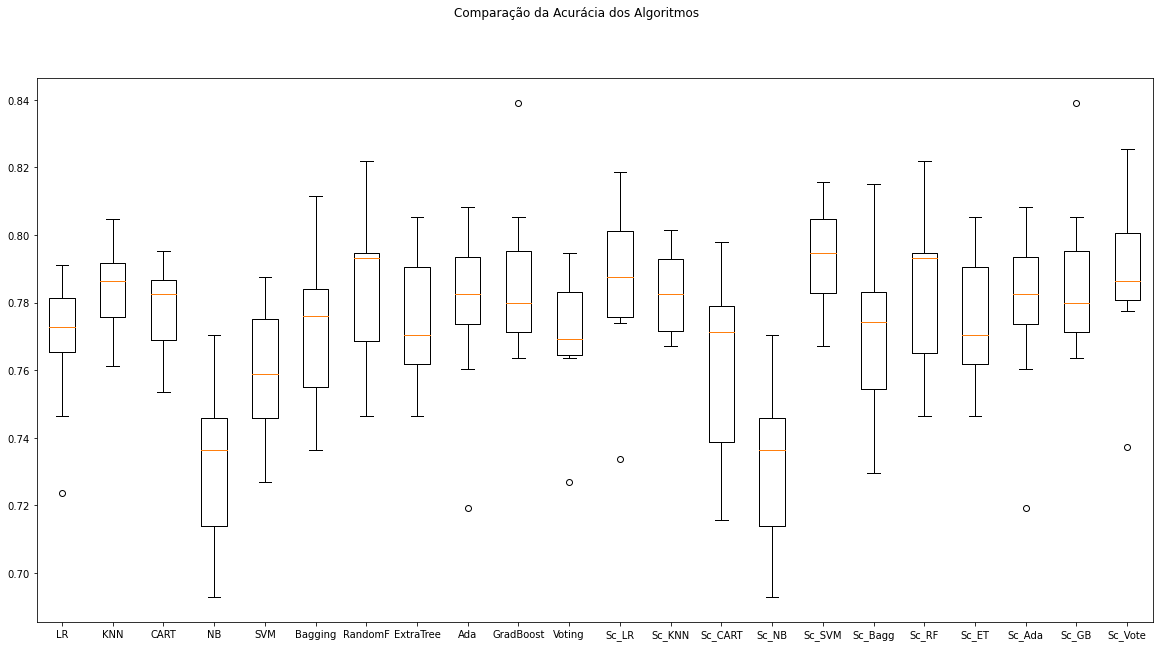

In [84]:
#df2

np.random.seed(7) # definindo uma semente global


#definindo os parâmetros para Bagging 
baseg = DecisionTreeClassifier()
num_treesg = 125  #Já foi testado com árvores entre 50 e 200 e o melhor foi com 125
max_featuresg = 3



#Criando os modelos para voting classifier
basesg = []
model1g = LogisticRegression(solver='liblinear')
basesg.append(('logistic', model1g))
model2g = DecisionTreeClassifier()
basesg.append(('cart', model2g))
model3g = SVC(gamma = 'auto')
basesg.append(('SVM', model3g))


#Preparando os modelos:
modelsg = []

#sem tratamento (padronização ou normalização)
modelsg.append(('LR', LogisticRegression(solver='liblinear'))) 
modelsg.append(('KNN', KNeighborsClassifier(metric= 'euclidean', n_neighbors= 21))) #melhor desempenho nos testes de gridsearch
modelsg.append(('CART', DecisionTreeClassifier(criterion= 'gini', max_features= 'log2', min_samples_split= 128))) 
modelsg.append(('NB', GaussianNB()))
modelsg.append(('SVM', SVC(gamma='auto', C= 2.0, kernel= 'rbf'))) #melhor desempenho nos testes de gridsearch
modelsg.append(('Bagging', BaggingClassifier(base_estimator=baseg, n_estimators=num_treesg, random_state=seed)))
modelsg.append(('RandomF', RandomForestClassifier(n_estimators=num_treesg, min_samples_split=5, max_features=max_featuresg, random_state=seed)))
modelsg.append(('ExtraTree', ExtraTreesClassifier(n_estimators=num_treesg, max_features=max_featuresg, random_state=seed)))
modelsg.append(('Ada', AdaBoostClassifier(n_estimators=num_treesg, random_state=seed)))
modelsg.append(('GradBoost', GradientBoostingClassifier(n_estimators=num_treesg, random_state=seed)))
modelsg.append(('Voting', VotingClassifier(basesg)))


#Com normalização:

modelsg.append(('Sc_LR', Pipeline([('Scaler', StandardScaler()), ('LR', LogisticRegression(solver='liblinear'))]))) 
modelsg.append(('Sc_KNN', Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsClassifier(metric= 'euclidean', n_neighbors= 21))]))) #melhor desempenho nos testes de gridsearch
modelsg.append(('Sc_CART', Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeClassifier(criterion= 'gini', max_features= 'log2', min_samples_split= 128))])))
modelsg.append(('Sc_NB', Pipeline([('Scaler', StandardScaler()), (('NB', GaussianNB()))])))
modelsg.append(('Sc_SVM', Pipeline([('Scaler', StandardScaler()), (('SVM', SVC(gamma='auto', C= 2.0, kernel= 'rbf')))]))) #melhor desempenho nos testes de gridsearch
modelsg.append(('Sc_Bagg', Pipeline([('Scaler', StandardScaler()), (('Bagging', BaggingClassifier(base_estimator=baseg, n_estimators=num_treesg, random_state=seed)))])))
modelsg.append(('Sc_RF', Pipeline([('Scaler', StandardScaler()), (('RandomF', RandomForestClassifier(n_estimators=num_treesg,min_samples_split=5, max_features=max_featuresg, random_state=seed)))]))) 
modelsg.append(('Sc_ET', Pipeline([('Scaler', StandardScaler()), (('ExtraTree', ExtraTreesClassifier(n_estimators=num_treesg, max_features=max_featuresg, random_state=seed)))])))
modelsg.append(('Sc_Ada', Pipeline([('Scaler', StandardScaler()), (('Ada', AdaBoostClassifier(n_estimators=num_treesg, random_state=seed)))])))
modelsg.append(('Sc_GB', Pipeline([('Scaler', StandardScaler()), (('GradBoost', GradientBoostingClassifier(n_estimators=num_treesg, random_state=seed)))])))
modelsg.append(('Sc_Vote', Pipeline([('Scaler', StandardScaler()), (('Voting', VotingClassifier(basesg)))])))

#Avaliando um modelo por vez
resultsg=[]
namesg=[]
scoring='accuracy'
folds=10

for name, model in modelsg:
  kfold = KFold(n_splits=folds)
  cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
  resultsg.append(cv_results)
  namesg.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) 
  print(msg)

print("\n")

# boxplot de comparação dos algoritmos
fig = plt.figure(figsize=(20,10)) 
fig.suptitle('Comparação da Acurácia dos Algoritmos') 
ax = fig.add_subplot(111) 
plt.boxplot(resultsg) 
ax.set_xticklabels(namesg) 
plt.show()

## Comparação dos algoritmos com o dataset completo e sem outliers df3

LR: 0.752078 (0.029008)
KNN: 0.759250 (0.029719)
CART: 0.751691 (0.029560)
NB: 0.720715 (0.030932)
SVM: 0.742246 (0.029527)
Bagging: 0.753216 (0.022247)
RandomF: 0.762662 (0.021355)
ExtraTree: 0.756987 (0.023525)
Ada: 0.755863 (0.027233)
GradBoost: 0.764947 (0.021004)
Voting: 0.747925 (0.025454)
Sc_LR: 0.767580 (0.027801)
Sc_KNN: 0.758493 (0.026413)
Sc_CART: 0.753589 (0.022541)
Sc_NB: 0.720715 (0.030932)
Sc_SVM: 0.771365 (0.023968)
Sc_Bagg: 0.753595 (0.020132)
Sc_RF: 0.763416 (0.023310)
Sc_ET: 0.757364 (0.023273)
Sc_Ada: 0.755863 (0.028007)
Sc_GB: 0.765326 (0.021444)
Sc_Vote: 0.768708 (0.023429)




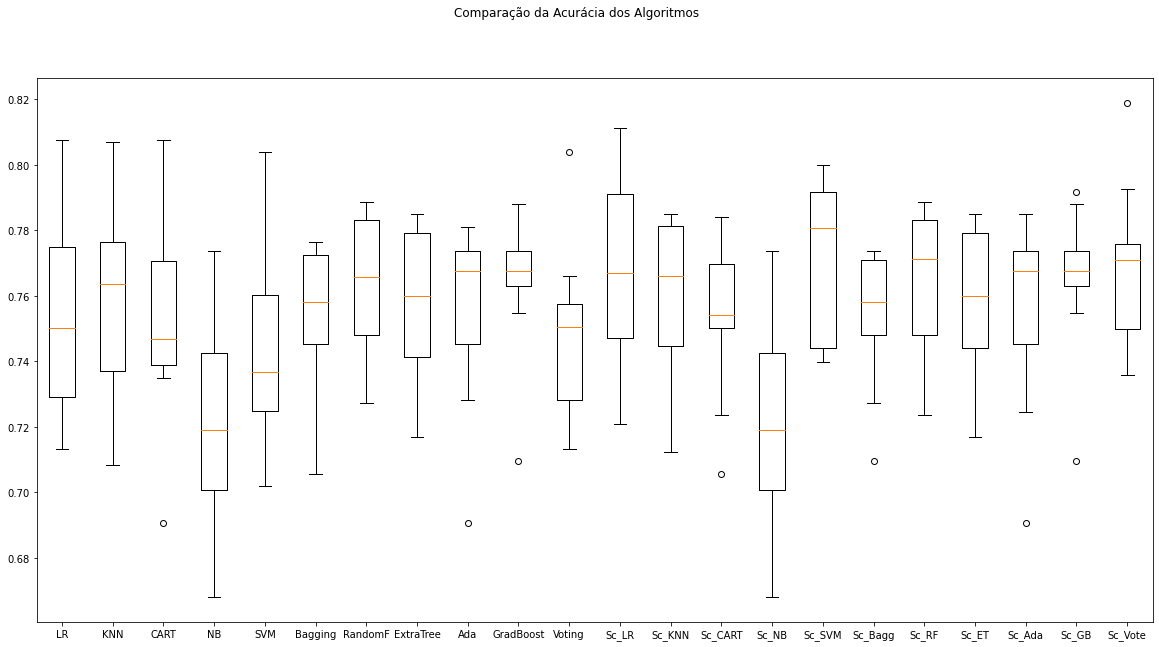

In [85]:
#df3

np.random.seed(7) # definindo uma semente global


#definindo os parâmetros para Bagging 
baseg = DecisionTreeClassifier()
num_treesg = 125  #Já foi testado com árvores entre 50 e 200 e o melhor foi com 125
max_featuresg = 3

#Criando os modelos para voting classifier
basesg = []
model1g = LogisticRegression(solver='liblinear')
basesg.append(('logistic', model1g))
model2g = DecisionTreeClassifier()
basesg.append(('cart', model2g))
model3g = SVC(gamma = 'auto')
basesg.append(('SVM', model3g))

#Preparando os modelos:
modelsg = []

#sem tratamento (padronização ou normalização)
modelsg.append(('LR', LogisticRegression(solver='liblinear'))) 
modelsg.append(('KNN', KNeighborsClassifier(metric= 'euclidean', n_neighbors= 21))) #melhor desempenho nos testes de gridsearch
modelsg.append(('CART', DecisionTreeClassifier(criterion= 'gini', max_features= 'log2', min_samples_split= 128))) 
modelsg.append(('NB', GaussianNB()))
modelsg.append(('SVM', SVC(gamma='auto', C= 2.0, kernel= 'rbf'))) #melhor desempenho nos testes de gridsearch
modelsg.append(('Bagging', BaggingClassifier(base_estimator=baseg, n_estimators=num_treesg, random_state=seed)))
modelsg.append(('RandomF', RandomForestClassifier(n_estimators=num_treesg, min_samples_split=5, max_features=max_featuresg, random_state=seed)))
modelsg.append(('ExtraTree', ExtraTreesClassifier(n_estimators=num_treesg, max_features=max_featuresg, random_state=seed)))
modelsg.append(('Ada', AdaBoostClassifier(n_estimators=num_treesg, random_state=seed)))
modelsg.append(('GradBoost', GradientBoostingClassifier(n_estimators=num_treesg, random_state=seed)))
modelsg.append(('Voting', VotingClassifier(basesg)))


#Com normalização:

modelsg.append(('Sc_LR', Pipeline([('Scaler', StandardScaler()), ('LR', LogisticRegression(solver='liblinear'))]))) 
modelsg.append(('Sc_KNN', Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsClassifier(metric= 'euclidean', n_neighbors= 21))]))) #melhor desempenho nos testes de gridsearch
modelsg.append(('Sc_CART', Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeClassifier(criterion= 'gini', max_features= 'log2', min_samples_split= 128))])))
modelsg.append(('Sc_NB', Pipeline([('Scaler', StandardScaler()), (('NB', GaussianNB()))])))
modelsg.append(('Sc_SVM', Pipeline([('Scaler', StandardScaler()), (('SVM', SVC(gamma='auto', C= 2.0, kernel= 'rbf')))]))) #melhor desempenho nos testes de gridsearch
modelsg.append(('Sc_Bagg', Pipeline([('Scaler', StandardScaler()), (('Bagging', BaggingClassifier(base_estimator=baseg, n_estimators=num_treesg, random_state=seed)))])))
modelsg.append(('Sc_RF', Pipeline([('Scaler', StandardScaler()), (('RandomF', RandomForestClassifier(n_estimators=num_treesg, min_samples_split=5, max_features=max_featuresg, random_state=seed)))]))) 
modelsg.append(('Sc_ET', Pipeline([('Scaler', StandardScaler()), (('ExtraTree', ExtraTreesClassifier(n_estimators=num_treesg, max_features=max_featuresg, random_state=seed)))])))
modelsg.append(('Sc_Ada', Pipeline([('Scaler', StandardScaler()), (('Ada', AdaBoostClassifier(n_estimators=num_treesg, random_state=seed)))])))
modelsg.append(('Sc_GB', Pipeline([('Scaler', StandardScaler()), (('GradBoost', GradientBoostingClassifier(n_estimators=num_treesg, random_state=seed)))])))
modelsg.append(('Sc_Vote', Pipeline([('Scaler', StandardScaler()), (('Voting', VotingClassifier(basesg)))])))

#Avaliando um modelo por vez
resultsg=[]
namesg=[]
scoring='accuracy'
folds=10

for name, model in modelsg:
  kfold = KFold(n_splits=folds)
  cv_results = cross_val_score(model, x_train1, y_train1, cv=kfold, scoring=scoring)
  resultsg.append(cv_results)
  namesg.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) 
  print(msg)

print("\n")

# boxplot de comparação dos algoritmos
fig = plt.figure(figsize=(20,10)) 
fig.suptitle('Comparação da Acurácia dos Algoritmos') 
ax = fig.add_subplot(111) 
plt.boxplot(resultsg) 
ax.set_xticklabels(namesg) 
plt.show()

## Comparação dos algoritmos com o dataset reduzido e com outliers df4

LR: 0.768741 (0.019041)
KNN: 0.788229 (0.014006)
CART: 0.768728 (0.024628)
NB: 0.728030 (0.020954)
SVM: 0.771476 (0.019952)
Bagging: 0.774208 (0.024165)
RandomF: 0.780020 (0.014610)
ExtraTree: 0.775918 (0.013917)
Ada: 0.782750 (0.015717)
GradBoost: 0.787197 (0.018874)
Voting: 0.765314 (0.021367)
Sc_LR: 0.788581 (0.023108)
Sc_KNN: 0.785483 (0.014758)
Sc_CART: 0.764966 (0.018425)
Sc_NB: 0.728030 (0.020954)
Sc_SVM: 0.798492 (0.018392)
Sc_Bagg: 0.773864 (0.024445)
Sc_RF: 0.781731 (0.013836)
Sc_ET: 0.776602 (0.014468)
Sc_Ada: 0.782750 (0.015717)
Sc_GB: 0.786854 (0.018893)
Sc_Vote: 0.797473 (0.018663)




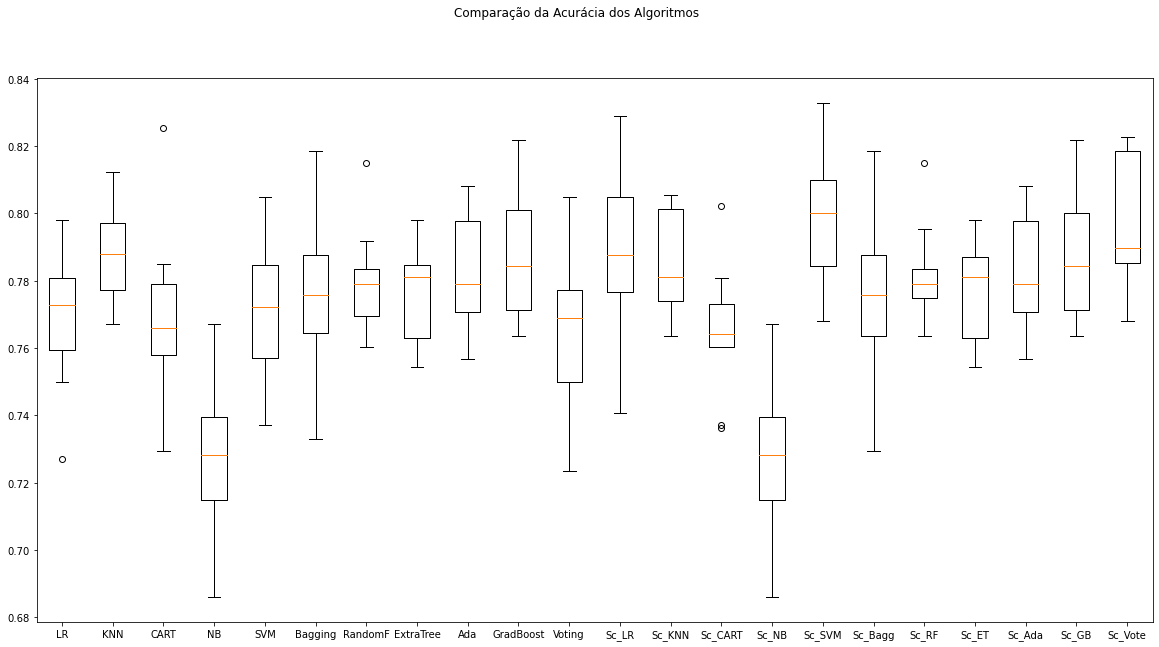

In [86]:
#df4

np.random.seed(7) # definindo uma semente global


#definindo os parâmetros para Bagging 
baseg = DecisionTreeClassifier()
num_treesg = 125  #Já foi testado com árvores entre 50 e 200 e o melhor foi com 125
max_featuresg = 3

#Criando os modelos para voting classifier
basesg = []
model1g = LogisticRegression(solver='liblinear')
basesg.append(('logistic', model1g))
model2g = DecisionTreeClassifier()
basesg.append(('cart', model2g))
model3g = SVC(gamma = 'auto')
basesg.append(('SVM', model3g))

#Preparando os modelos:
modelsg = []

#sem tratamento (padronização ou normalização)
modelsg.append(('LR', LogisticRegression(solver='liblinear'))) 
modelsg.append(('KNN', KNeighborsClassifier(metric= 'euclidean', n_neighbors= 21))) #melhor desempenho nos testes de gridsearch
modelsg.append(('CART', DecisionTreeClassifier(criterion= 'gini', max_features= 'log2', min_samples_split= 128))) 
modelsg.append(('NB', GaussianNB()))
modelsg.append(('SVM', SVC(gamma='auto', C= 2.0, kernel= 'rbf'))) #melhor desempenho nos testes de gridsearch
modelsg.append(('Bagging', BaggingClassifier(base_estimator=baseg, n_estimators=num_treesg, random_state=seed)))
modelsg.append(('RandomF', RandomForestClassifier(n_estimators=num_treesg, min_samples_split=5, max_features=max_featuresg, random_state=seed)))
modelsg.append(('ExtraTree', ExtraTreesClassifier(n_estimators=num_treesg, max_features=max_featuresg, random_state=seed)))
modelsg.append(('Ada', AdaBoostClassifier(n_estimators=num_treesg, random_state=seed)))
modelsg.append(('GradBoost', GradientBoostingClassifier(n_estimators=num_treesg, random_state=seed)))
modelsg.append(('Voting', VotingClassifier(basesg)))


#Com normalização:

modelsg.append(('Sc_LR', Pipeline([('Scaler', StandardScaler()), ('LR', LogisticRegression(solver='liblinear'))]))) 
modelsg.append(('Sc_KNN', Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsClassifier(metric= 'euclidean', n_neighbors= 21))]))) #melhor desempenho nos testes de gridsearch
modelsg.append(('Sc_CART', Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeClassifier(criterion= 'gini', max_features= 'log2', min_samples_split= 128))])))
modelsg.append(('Sc_NB', Pipeline([('Scaler', StandardScaler()), (('NB', GaussianNB()))])))
modelsg.append(('Sc_SVM', Pipeline([('Scaler', StandardScaler()), (('SVM', SVC(gamma='auto', C= 2.0, kernel= 'rbf')))]))) #melhor desempenho nos testes de gridsearch
modelsg.append(('Sc_Bagg', Pipeline([('Scaler', StandardScaler()), (('Bagging', BaggingClassifier(base_estimator=baseg, n_estimators=num_treesg, random_state=seed)))])))
modelsg.append(('Sc_RF', Pipeline([('Scaler', StandardScaler()), (('RandomF', RandomForestClassifier(n_estimators=num_treesg,min_samples_split=5, max_features=max_featuresg, random_state=seed)))]))) 
modelsg.append(('Sc_ET', Pipeline([('Scaler', StandardScaler()), (('ExtraTree', ExtraTreesClassifier(n_estimators=num_treesg, max_features=max_featuresg, random_state=seed)))])))
modelsg.append(('Sc_Ada', Pipeline([('Scaler', StandardScaler()), (('Ada', AdaBoostClassifier(n_estimators=num_treesg, random_state=seed)))])))
modelsg.append(('Sc_GB', Pipeline([('Scaler', StandardScaler()), (('GradBoost', GradientBoostingClassifier(n_estimators=num_treesg, random_state=seed)))])))
modelsg.append(('Sc_Vote', Pipeline([('Scaler', StandardScaler()), (('Voting', VotingClassifier(basesg)))])))

#Avaliando um modelo por vez
resultsg=[]
namesg=[]
scoring='accuracy'
folds=10

for name, model in modelsg:
  kfold = KFold(n_splits=folds)
  cv_results = cross_val_score(model, x_train2, y_train2, cv=kfold, scoring=scoring)
  resultsg.append(cv_results)
  namesg.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) 
  print(msg)

print("\n")

# boxplot de comparação dos algoritmos
fig = plt.figure(figsize=(20,10)) 
fig.suptitle('Comparação da Acurácia dos Algoritmos') 
ax = fig.add_subplot(111) 
plt.boxplot(resultsg) 
ax.set_xticklabels(namesg) 
plt.show()

## Conclusão: 

Melhores modelos por Dataframe (junto ao desvio padrão):

**df2 (completo e com outlier): SC SVM 79,26% acurácia e desvio padrão = 0,015**

'Scaler', StandardScaler()), (('SVM', SVC(gamma='auto', C= 2.0, kernel= 'rbf')))]))




**df3 (sem outlier): SC SVM 77,10% acurácia e desvio padrão = 0,023**


 Scaler', StandardScaler()), (('SVM',SVC(gamma='auto', C= 2.0, kernel= 'rbf')



**df4 (com outlier mas sem 3 atributos): SC SVM 79,84% acurácia e desvio padrão = 0,018**

Scaler', StandardScaler()), (('SVM', SVC(gamma='auto', C= 2.5, kernel= 'rbf'


# Pós-processamento

In [87]:
#Preparando o modelo
scaler = StandardScaler().fit(x_train2)
rescaledx2 = scaler.transform(x_train2)
model = SVC(C=2.5,kernel='rbf')
model.fit(rescaledx2,y_train2)

#estimativa da acurácia do conjunto de teste
rescaledtestx2 = scaler.transform(x_test2)
predictions = model.predict(rescaledtestx2)
print(accuracy_score(y_test2,predictions))
print(confusion_matrix(y_test2,predictions))
print(classification_report(y_test2,predictions))

0.8086124401913876
[[523 118]
 [122 491]]
              precision    recall  f1-score   support

         0.0       0.81      0.82      0.81       641
         1.0       0.81      0.80      0.80       613

    accuracy                           0.81      1254
   macro avg       0.81      0.81      0.81      1254
weighted avg       0.81      0.81      0.81      1254



Desempenho com os dados de teste foram ainda melhores, alcançando aproximadamente 81% de acurácia. O modelo escolhido retirou três atributos: Fêmea, Macho e Altura. A não utilização dos dados de Fêmea e Maco pode ser explicada devido a grande similaridade de distribuição para as classes (vide gráficos pairplot seaborn divido pelo sexo) e a distribuição de altura é muito similar para todos não ajudando na modelagem.


In [88]:
#Treinando com todo o dataset

#Preparando o modelo
scaler = StandardScaler().fit(x2)
rescaledx2 = scaler.transform(x2)
model = SVC(C=2.5,kernel='rbf')
model.fit(rescaledx2,y2)

SVC(C=2.5)

In [89]:
import  pickle

Pkl_Filename = "Pickled_SVM_Model.pkl"

with open (Pkl_Filename, 'wb') as file:
  pickle.dump(model,file)